# Project Description

Introduction:
    
This capstone project focuses on developing a machine learning model for temperature forecasting. The goal is to predict the next-day maximum and minimum air temperatures in Seoul, South Korea. 
By utilizing historical weather data, forecast data from the LDAPS model, and geographic auxiliary variables, we aim to build separate models to predict the maximum and minimum temperatures for the following day.  

LDAPS = 'Local Data Assimilation and Prediction System'operated by the Korean Meteorological Administration for weather forecasting and climate research.

Dataset Context and Relevance:

The dataset used here in this project consists of summer weather data from 2013 to 2017 in Seoul, South Korea. It includes a range of variables such as present-day temperatures, LDAPS model forecasts, in-situ temperature measurements, and geographic features. These variables capture important aspects related to temperature, humidity, wind speed, cloud cover, and precipitation.


In [1]:
# Importing Necessary Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing Dataset

Dataset Description:

The dataset which is used in this project can be accessed from the following link: https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

Column Description:
This data set consist of 25 columns, which helps to predict the two target variables i.e.,
1. Next_Tmax: The next-day maximum air temperature (°C)
2. Next_Tmin: The next-day minimum air temperature (°C)

Input variables for making the predictions are:

1. station: Weather station number (categorical)
2. Date: Present day in the format yyyy-mm-dd
3. Present_Tmax: Maximum air temperature between 0 and 21 h on the present day (°C)
4. Present_Tmin: Minimum air temperature between 0 and 21 h on the present day (°C)
5. LDAPS_RHmin: LDAPS model forecast of next-day minimum relative humidity (%)
6. LDAPS_RHmax: LDAPS model forecast of next-day maximum relative humidity (%)
7. LDAPS_Tmax_lapse: LDAPS model forecast of next-day maximum air temperature applied lapse rate (°C)
8. LDAPS_Tmin_lapse: LDAPS model forecast of next-day minimum air temperature applied lapse rate (°C)
9. LDAPS_WS: LDAPS model forecast of next-day average wind speed (m/s)
10. LDAPS_LH: LDAPS model forecast of next-day average latent heat flux (W/m2)
11. LDAPS_CC1: LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%)
12. LDAPS_CC2: LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%)
13. LDAPS_CC3: LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%)
14. LDAPS_CC4: LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%)
15. LDAPS_PPT1: LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%)
16. LDAPS_PPT2: LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%)
17. LDAPS_PPT3: LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%)
18. LDAPS_PPT4: LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%)
19. lat: Latitude (°)
20. lon: Longitude (°)
21. DEM: Elevation (m)
22. Slope: Slope (°)
23. Solar radiation: Daily incoming solar radiation (wh/m2)

In [2]:
df= pd.read_csv("temperature.csv")

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
df= df.drop(['Date'], axis=1)

# Exploratory Data Analysis(EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

In [6]:
# Check the columns
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
# Check the dimension
df.shape

(7752, 24)

There are 7750 rows and 24 columns, in which 2 are target variable and 22 are independent variable.

In [8]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
# Now just check the missing values present in each column, if any

df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
# Filling missing values of numerical column
df['station'].fillna(df['station'].mean(), inplace= True)
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(), inplace= True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(), inplace= True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(), inplace= True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(), inplace= True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(), inplace= True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(), inplace= True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(), inplace= True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(), inplace= True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(), inplace= True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(), inplace= True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(), inplace= True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(), inplace= True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(), inplace= True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(), inplace= True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(), inplace= True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(), inplace= True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(), inplace= True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(), inplace= True)

In [11]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

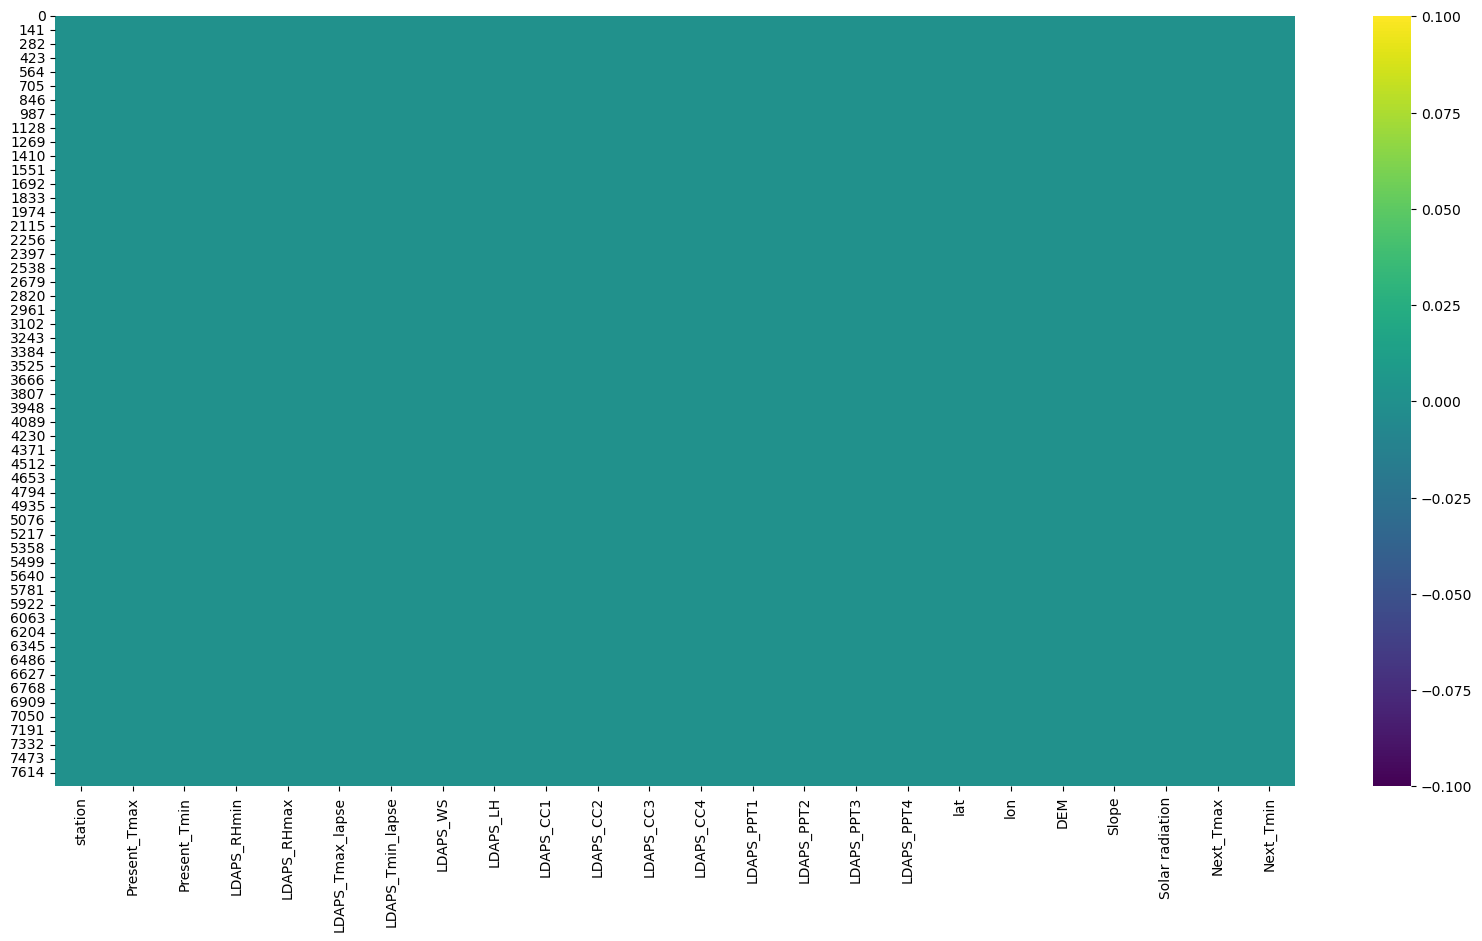

In [12]:
# Lets visualize this by using heat map

plt.figure(figsize= (20,10))
sns.heatmap(df.isnull(), cmap= 'viridis')
plt.show()

As this is clearly visualized that there is no null values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


# Description of Dataset

In [14]:
# Statistical Summary of Numerical Columns
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable.

These statistics provide information about the distribution and range of values in each column of your dataset. They can be useful for understanding the central tendency, variability, and overall distribution of the data.

# Data Visualization- Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data.

Univariate Analysis

Numerical Columns

1. 'Present_Tmax'

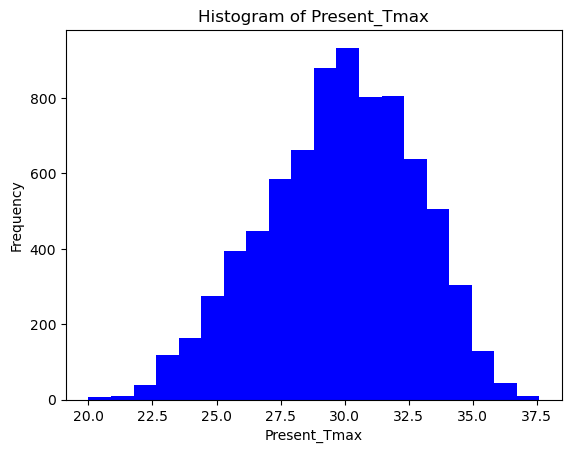

In [15]:
# Let's analyze the 'Present_Tmax' column by using histogram plot

plt.hist(df['Present_Tmax'], bins=20, color='blue')
plt.xlabel('Present_Tmax')
plt.ylabel('Frequency')
plt.title('Histogram of Present_Tmax')
plt.show()

Here we can see peak is at 30, as frequent values are from this range.

2. 'Present_Tmin'

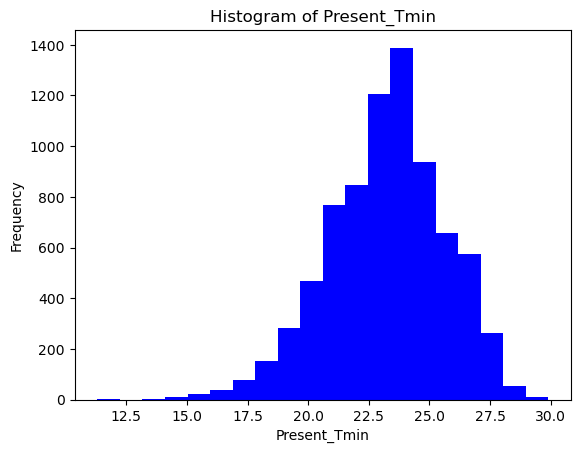

In [16]:
# Let's analyze the 'Present_Tmin' column by using histogram plot

plt.hist(df['Present_Tmin'], bins=20, color='blue')
plt.xlabel('Present_Tmin')
plt.ylabel('Frequency')
plt.title('Histogram of Present_Tmin')
plt.show()

Here we can see peak is arount 23.5-24.5 range, that means frequent values are from this range.

3. 'LDAPS_RHmin'

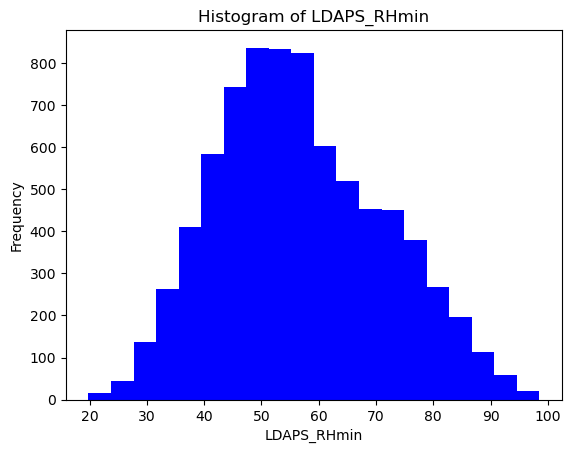

In [17]:
# Let's analyze the 'LDAPS_RHmin' column by using histogram plot

plt.hist(df['LDAPS_RHmin'], bins=20, color='blue')
plt.xlabel('LDAPS_RHmin')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_RHmin')
plt.show()

Here we can see peak is at 50, most frequent values are from this range.

4. 'LDAPS_RHmax'

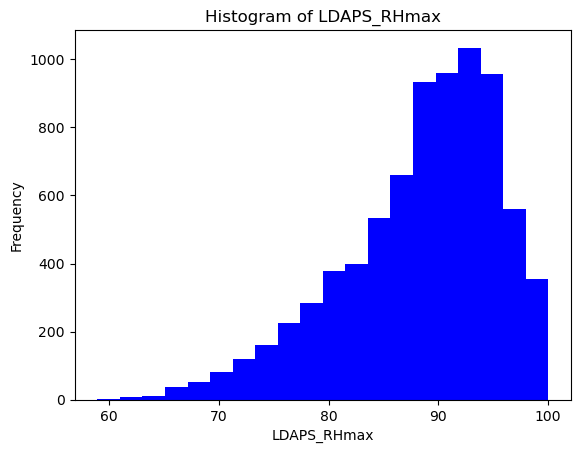

In [18]:
# Let's analyze the 'LDAPS_RHmax' column by using histogram plot

plt.hist(df['LDAPS_RHmax'], bins=20, color='blue')
plt.xlabel('LDAPS_RHmax')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_RHmax')
plt.show()

Here we can see peak is arount 94 as most frequent values are from this point.

5. 'LDAPS_Tmax_lapse'

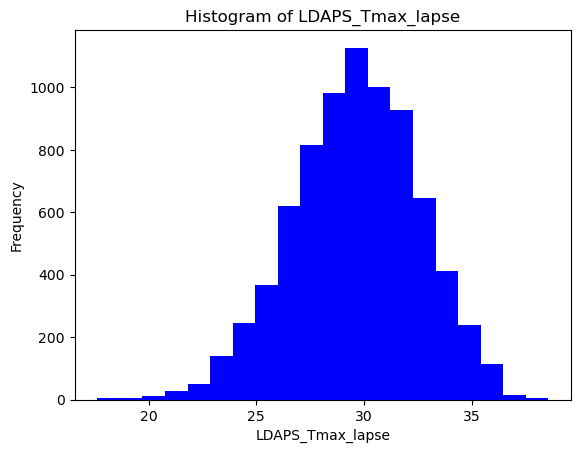

In [19]:
# Let's analyze the 'LDAPS_Tmax_lapse' column by using histogram plot

plt.hist(df['LDAPS_Tmax_lapse'], bins=20, color='blue')
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_Tmax_lapse')
plt.show()

Here we can see the peak is around 30, that means more frequent values are from this point.

6. 'LDAPS_Tmin_lapse'

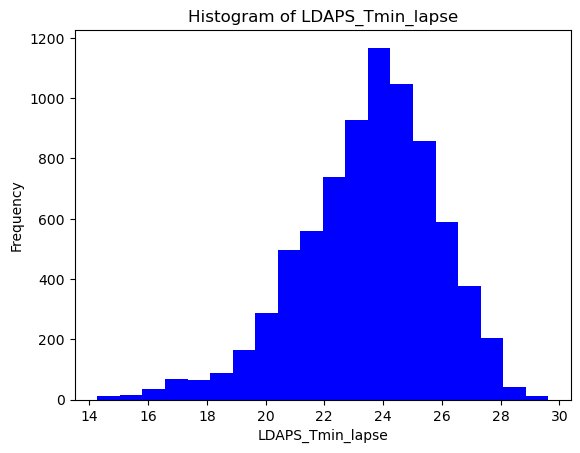

In [20]:
# Let's analyze the 'LDAPS_Tmin_lapse' column by using histogram plot

plt.hist(df['LDAPS_Tmin_lapse'], bins=20, color='blue')
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_Tmin_lapse')
plt.show()

Here we can see peak is around 24, as most frequent values lies here.

7. 'LDAPS_WS'

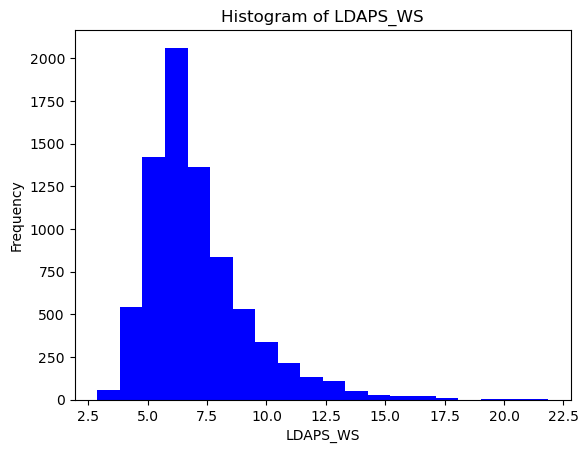

In [21]:
# Let's analyze the 'LDAPS_WS' column by using histogram plot

plt.hist(df['LDAPS_WS'], bins=20, color='blue')
plt.xlabel('LDAPS_WS')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_WS')
plt.show()

Here we can see peak is around 5.0-7.5, as most values lies in this point.

8. 'LDAPS_LH'

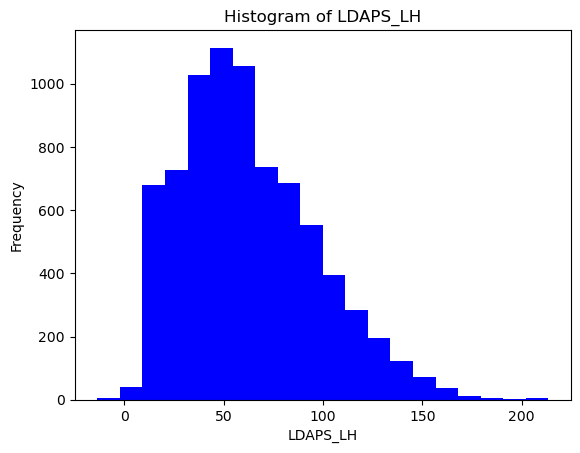

In [22]:
# Let's analyze the 'LDAPS_LH' column by using histogram plot

plt.hist(df['LDAPS_LH'], bins=20, color='blue')
plt.xlabel('LDAPS_LH')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_LH')
plt.show()

Here we can see the peak is at 50, means most frequent values lies at this point.

9. 'LDAPS_CC1'

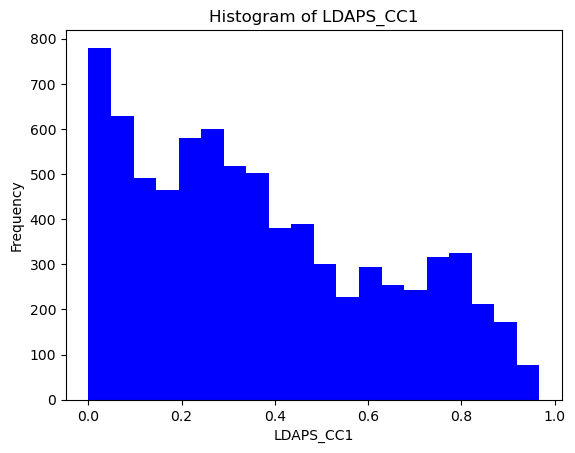

In [23]:
# Let's analyze the 'LDAPS_CC1' column by using histogram plot

plt.hist(df['LDAPS_CC1'], bins=20, color='blue')
plt.xlabel('LDAPS_CC1')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_CC1')
plt.show()

Here we can see peak is at 0 but rest distribution looks symmetrical.

10. 'LDAPS_PPT1'

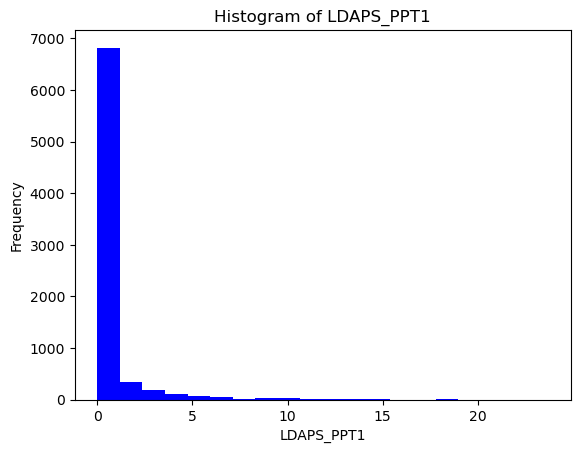

In [24]:
# Let's analyze the 'LDAPS_PPT1' column by using histogram plot

plt.hist(df['LDAPS_PPT1'], bins=20, color='blue')
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Frequency')
plt.title('Histogram of LDAPS_PPT1')
plt.show()

Here also we can see peak is at 0 and almost all the values lies at this point.

11. 'Solar radiation'

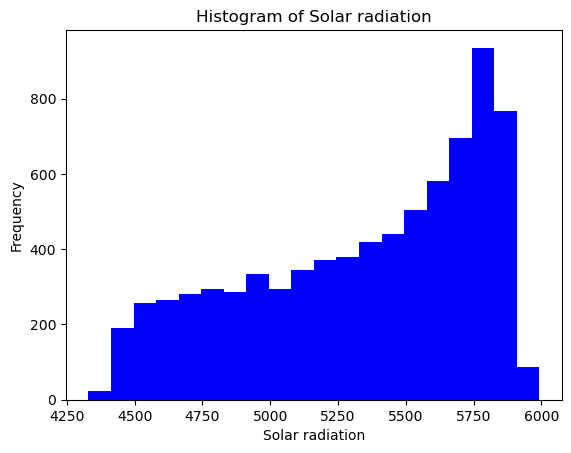

In [25]:
# Let's analyze the 'Solar radiation' column by using histogram plot

plt.hist(df['Solar radiation'], bins=20, color='blue')
plt.xlabel('Solar radiation')
plt.ylabel('Frequency')
plt.title('Histogram of Solar radiation')
plt.show()

Here we can see peak is at around 5750. and distribution is left skewed.

12. 'Next_Tmax'

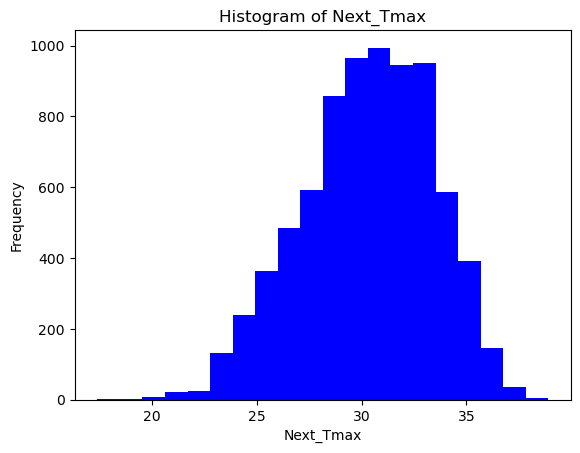

In [26]:
# Let's analyze the 'Next_Tmax' column by using histogram plot

plt.hist(df['Next_Tmax'], bins=20, color='blue')
plt.xlabel('Next_Tmax')
plt.ylabel('Frequency')
plt.title('Histogram of Next_Tmax')
plt.show()

Here we can see peak is around 30.

13. 'Next_Tmin'

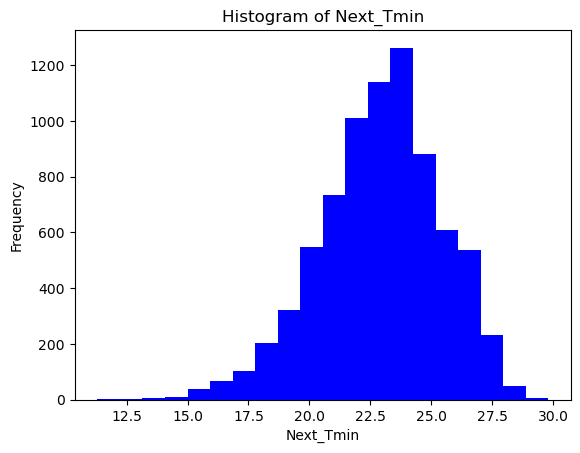

In [27]:
# Let's analyze the 'Next_Tmin' column by using histogram plot

plt.hist(df['Next_Tmin'], bins=20, color='blue')
plt.xlabel('Next_Tmin')
plt.ylabel('Frequency')
plt.title('Histogram of Next_Tmin')
plt.show()

Here we can see peak is at 24.

Bivariate Analysis

1. 'Next_Tmax' vs 'Present_Tmax' Columns

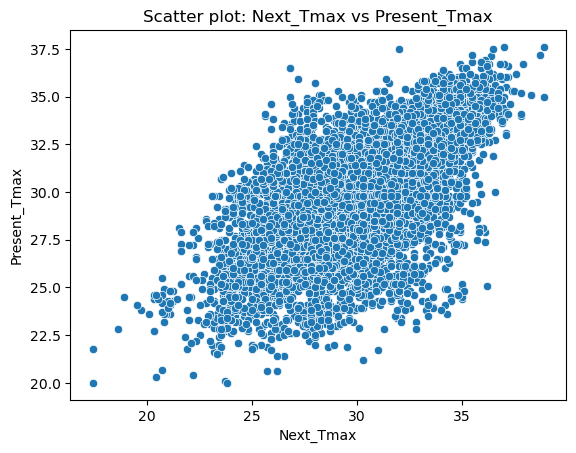

In [28]:
# let's visualize relationship

sns.scatterplot(data=df, x="Next_Tmax", y="Present_Tmax")
plt.xlabel("Next_Tmax")
plt.ylabel("Present_Tmax")
plt.title("Scatter plot: Next_Tmax vs Present_Tmax")
plt.show()

Here we can see the linear relation between the variables.

2. 'Next_Tmin' vs 'Present_Tmin' Columns

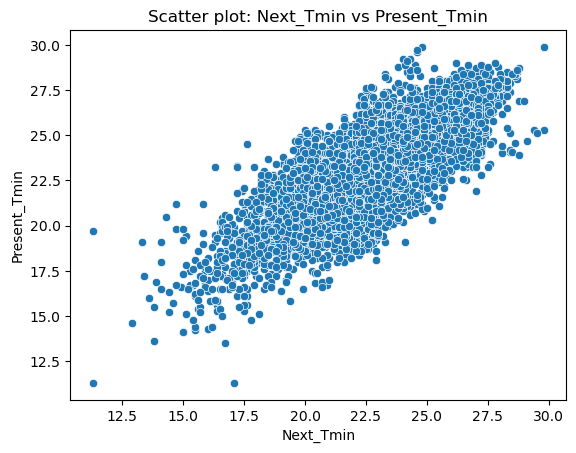

In [29]:
sns.scatterplot(data=df, x="Next_Tmin", y="Present_Tmin")
plt.xlabel("Next_Tmin")
plt.ylabel("Present_Tmin")
plt.title("Scatter plot: Next_Tmin vs Present_Tmin")
plt.show()

Here too we can see strong positive linear relation.

3. 'Next_Tmax' vs 'Solar radiation' Columns

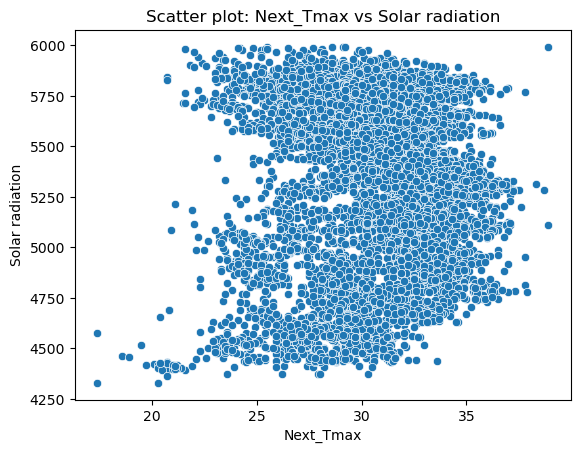

In [30]:
sns.scatterplot(data=df, x="Next_Tmax", y="Solar radiation")
plt.xlabel("Next_Tmax")
plt.ylabel("Solar radiation")
plt.title("Scatter plot: Next_Tmax vs Solar radiation")
plt.show()

Here we can see moderate negative linear relation.

4. 'Next_Tmin' vs 'Solar Radiation' Columns

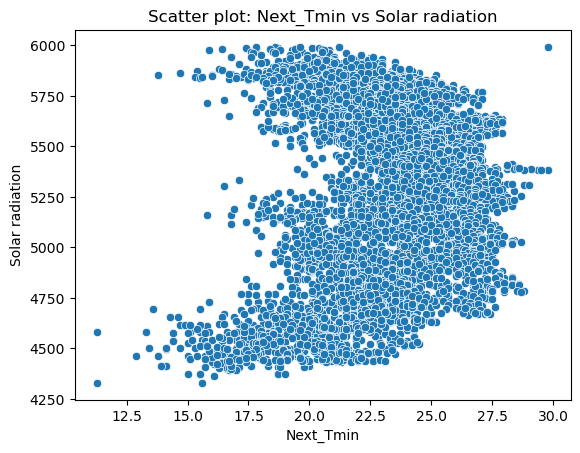

In [31]:
sns.scatterplot(data=df, x="Next_Tmin", y="Solar radiation")
plt.xlabel("Next_Tmin")
plt.ylabel("Solar radiation")
plt.title("Scatter plot: Next_Tmin vs Solar radiation")
plt.show()

Here also we can see moderate negative linear relation.

4. 'Next_Tmax' vs 'LDAPS_RHmax' Columns

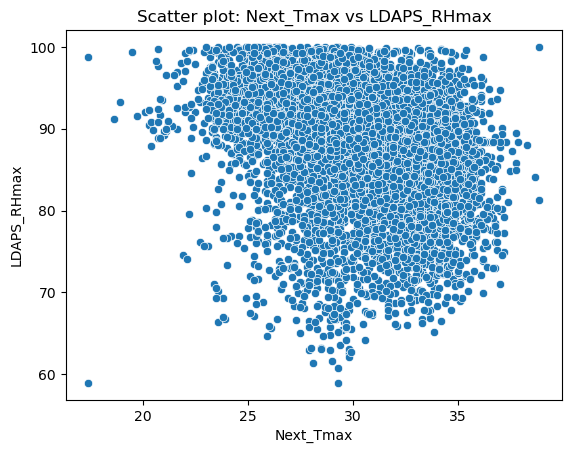

In [32]:
sns.scatterplot(data=df, x="Next_Tmax", y="LDAPS_RHmax")
plt.xlabel("Next_Tmax")
plt.ylabel("LDAPS_RHmax")
plt.title("Scatter plot: Next_Tmax vs LDAPS_RHmax")
plt.show()

Here we can see null relation.

5. 'Next_Tmin' vs 'LDAPS_RHmin' Columns

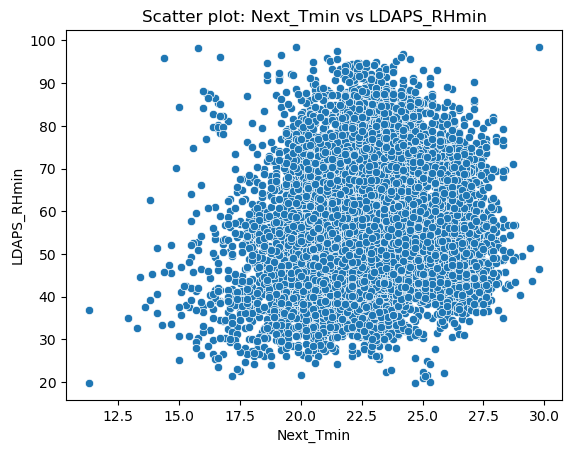

In [33]:
sns.scatterplot(data=df, x="Next_Tmin", y="LDAPS_RHmin")
plt.xlabel("Next_Tmin")
plt.ylabel("LDAPS_RHmin")
plt.title("Scatter plot: Next_Tmin vs LDAPS_RHmin")
plt.show()

Here too we can see no relation.

6. 'Next_Tmax' vs 'Present_Tmin' Columns

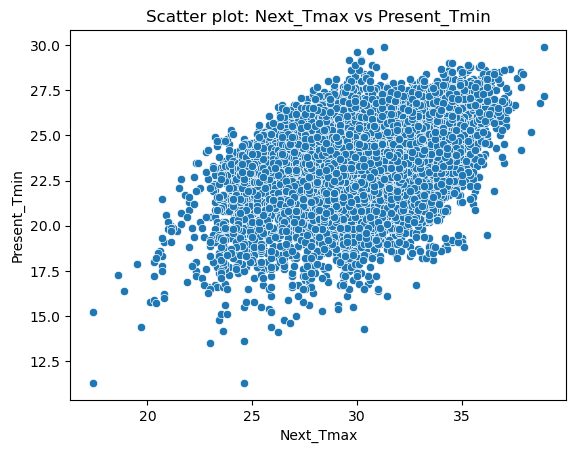

In [34]:
sns.scatterplot(data=df, x="Next_Tmax", y="Present_Tmin")
plt.xlabel("Next_Tmax")
plt.ylabel("Present_Tmin")
plt.title("Scatter plot: Next_Tmax vs Present_Tmin")
plt.show()

Here we can see positive linear relation.

7. 'Next_Tmin' vs 'Present_Tmax' Columns

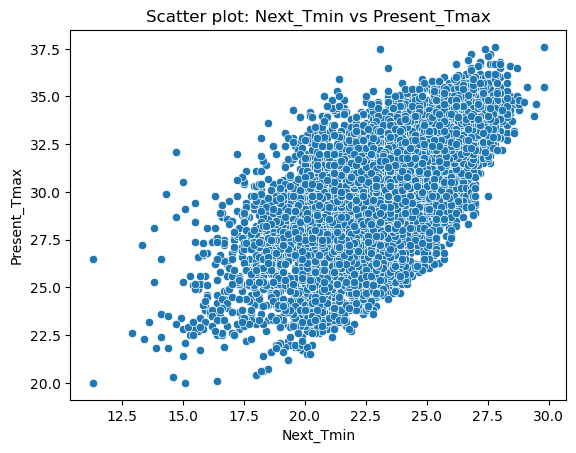

In [35]:
sns.scatterplot(data=df, x="Next_Tmin", y="Present_Tmax")
plt.xlabel("Next_Tmin")
plt.ylabel("Present_Tmax")
plt.title("Scatter plot: Next_Tmin vs Present_Tmax")
plt.show()

Here we can see positive linear relation.

8. 'Next_Tmax' vs 'LDAPS_RHmin' Columns

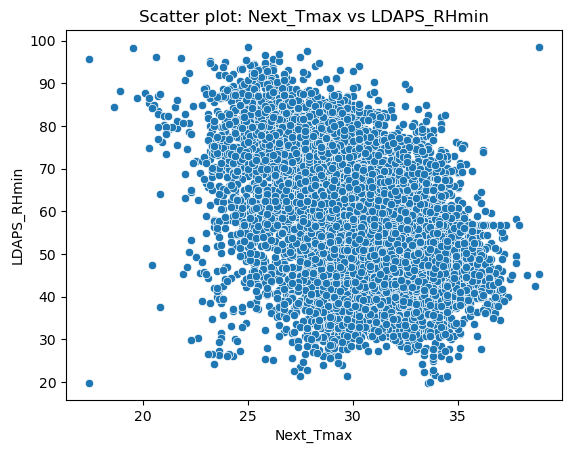

In [36]:
sns.scatterplot(data=df, x="Next_Tmax", y="LDAPS_RHmin")
plt.xlabel("Next_Tmax")
plt.ylabel("LDAPS_RHmin")
plt.title("Scatter plot: Next_Tmax vs LDAPS_RHmin")
plt.show()

Here too we can see moderate negative linear relation.

9. 'Next_Tmin' vs 'LDAPS_RHmax' Columns

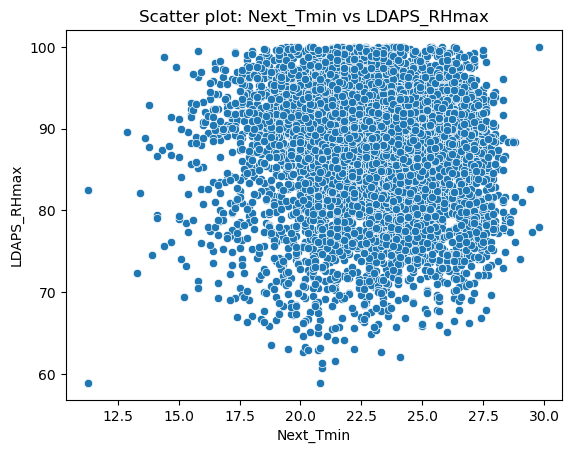

In [37]:
sns.scatterplot(data=df, x="Next_Tmin", y="LDAPS_RHmax")
plt.xlabel("Next_Tmin")
plt.ylabel("LDAPS_RHmax")
plt.title("Scatter plot: Next_Tmin vs LDAPS_RHmax")
plt.show()

Here we can see null relation.

# Multivariate Analysis

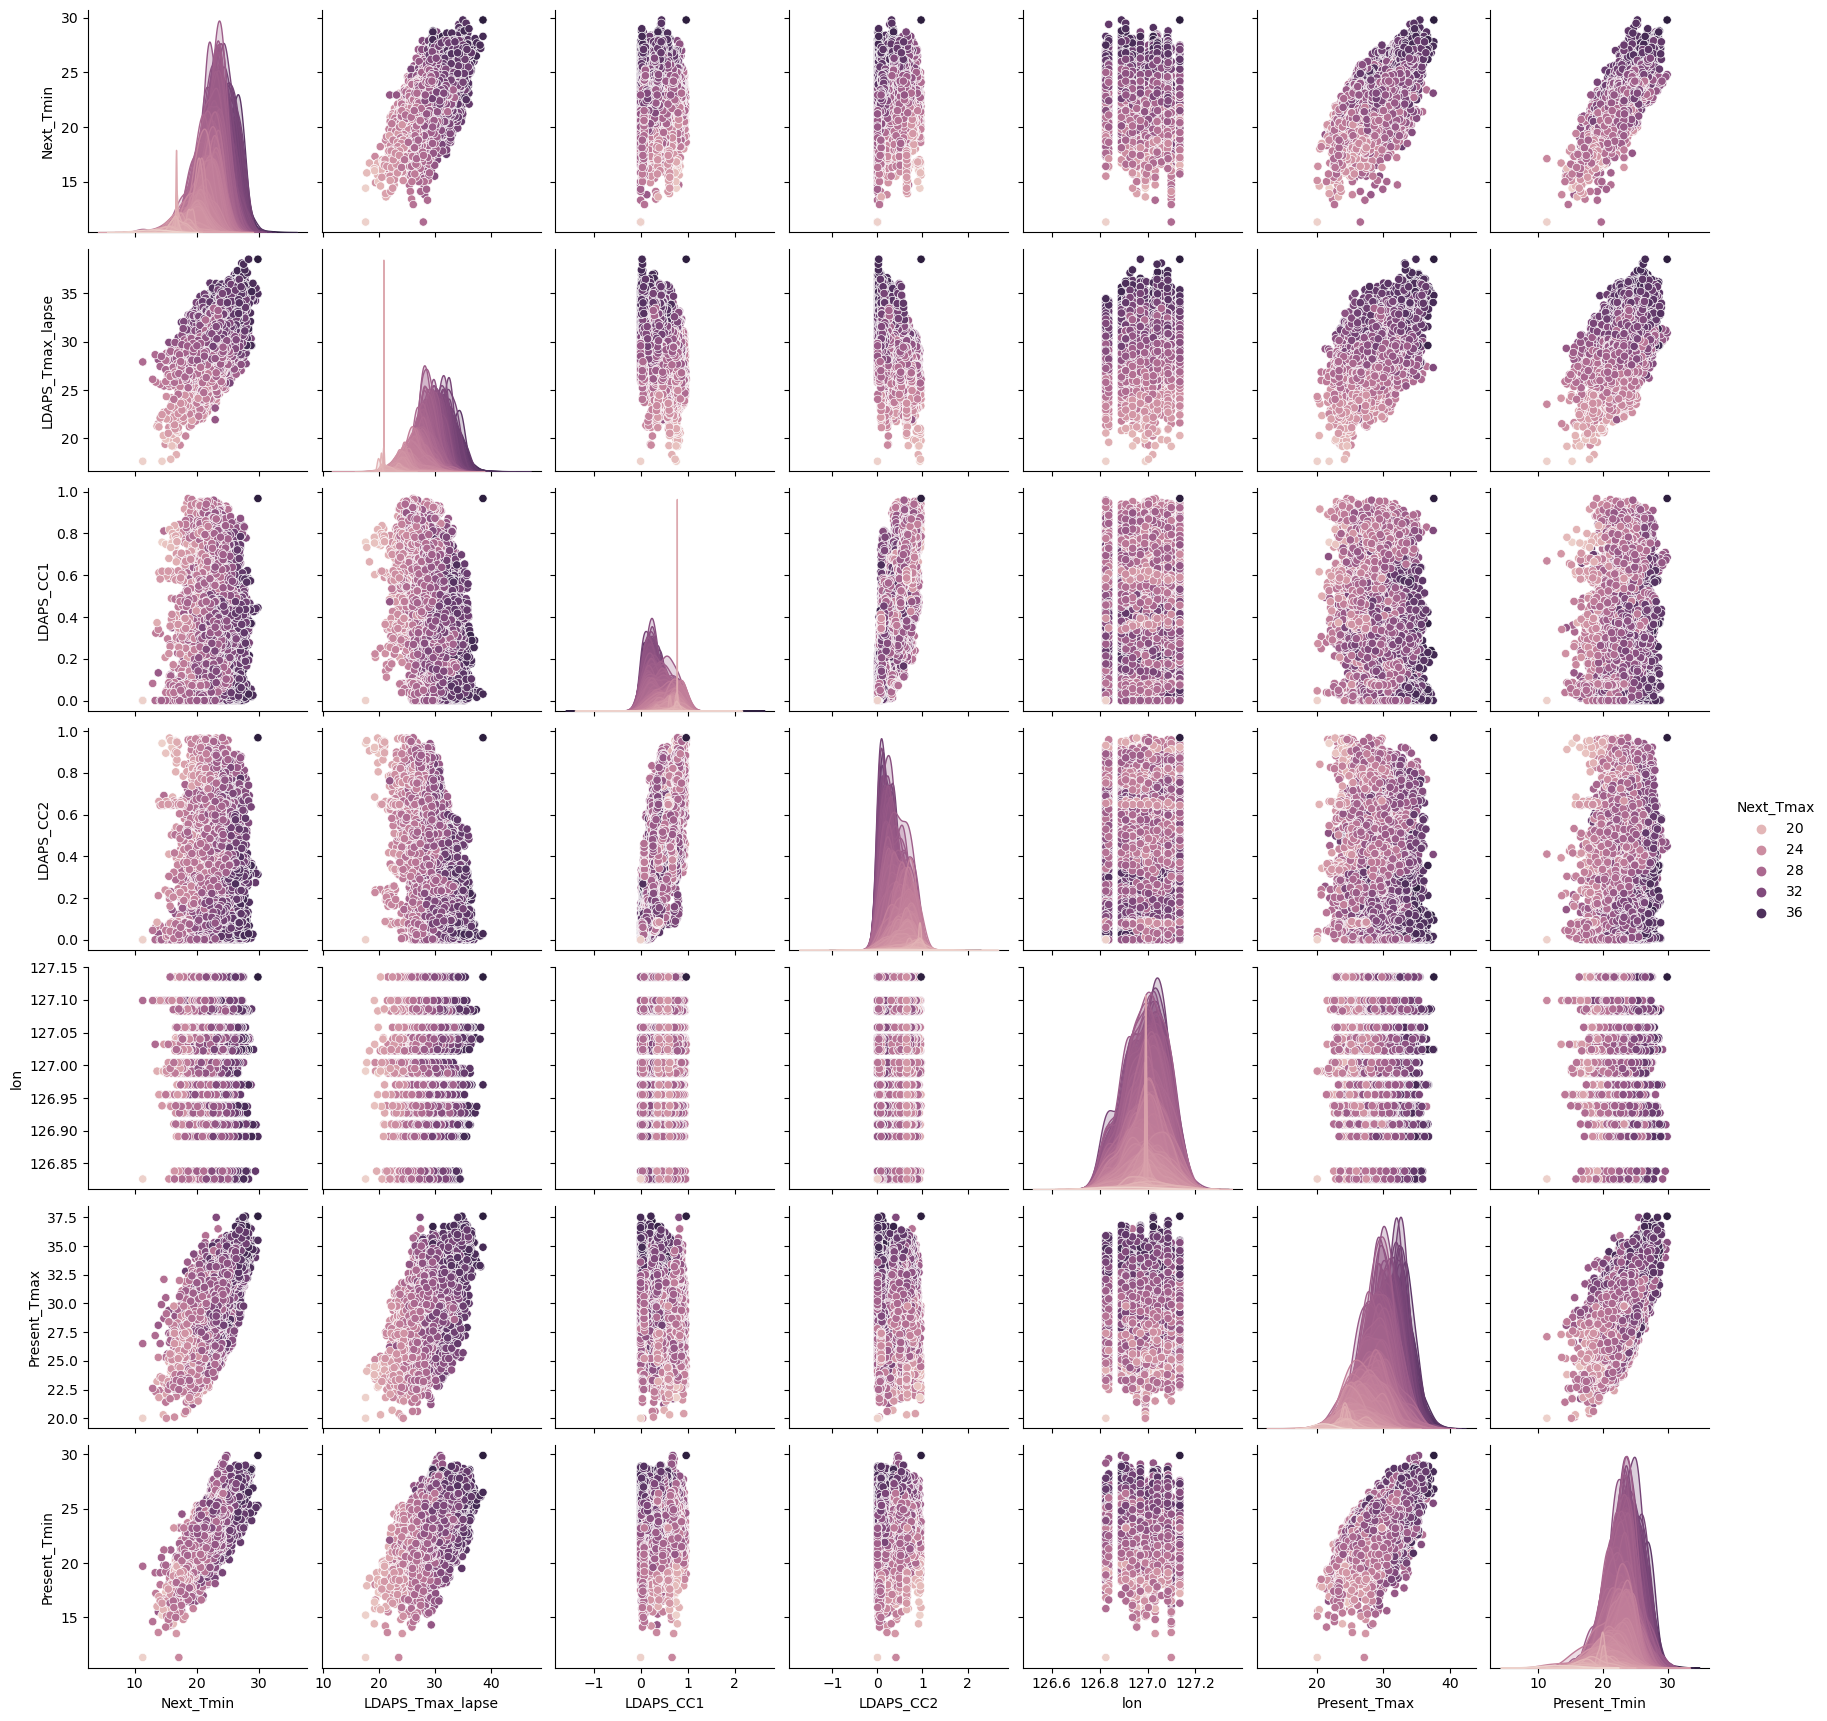

In [38]:
# Using Pairplot
subset_vars= ['Next_Tmin', 'Next_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'lon', 'Present_Tmax', 'Present_Tmin']
sns.pairplot(data=df[subset_vars] , hue= 'Next_Tmax')

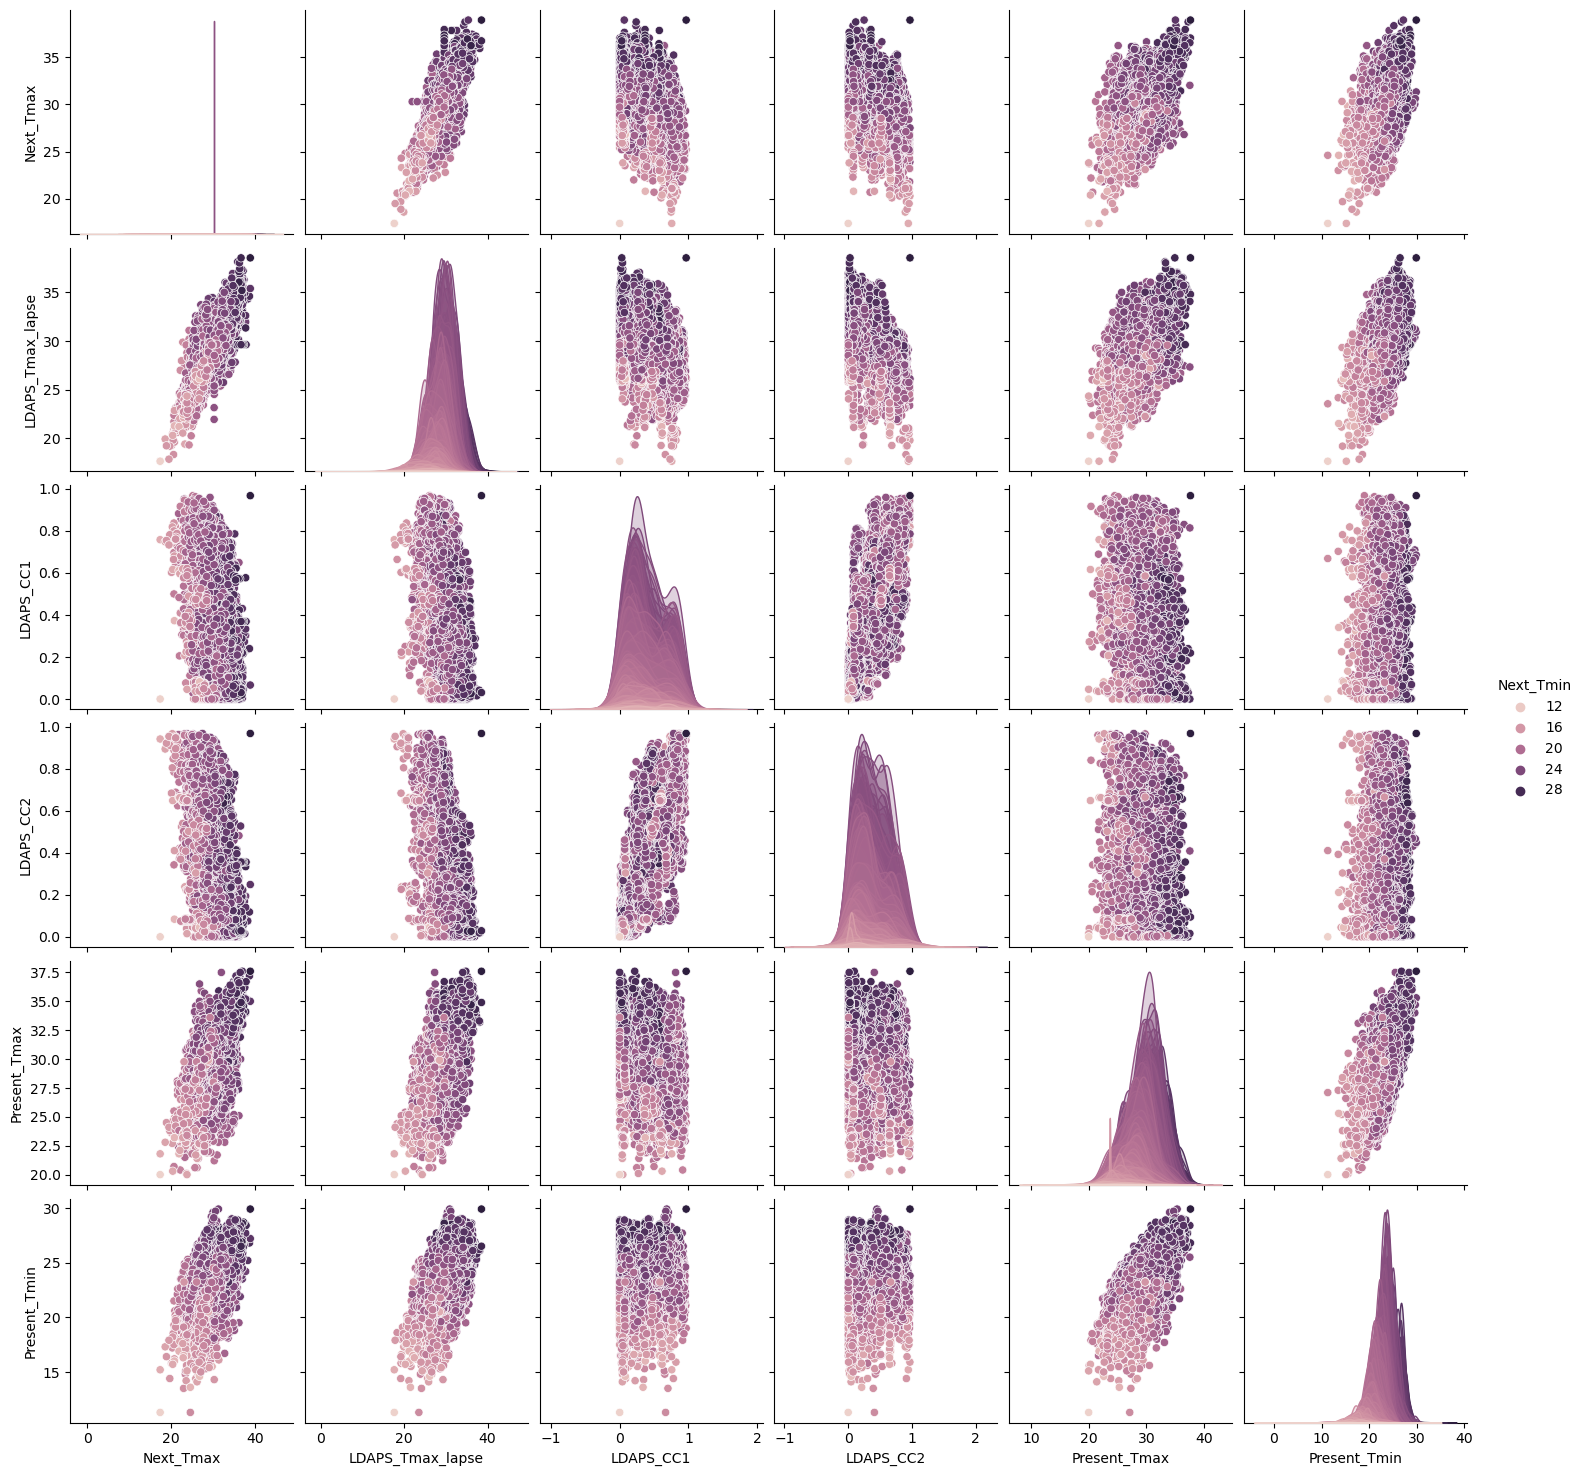

In [39]:
subset_vars= ['Next_Tmax', 'Next_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'Present_Tmax', 'Present_Tmin']
sns.pairplot(data=df[subset_vars] , hue= 'Next_Tmin')

# Data Preprocessing

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here to mitigate the impact of outliers and extreme observations on the analysis and avoid causing data loss.

For this we will be importing necessary library first from scipy.stats.mstats


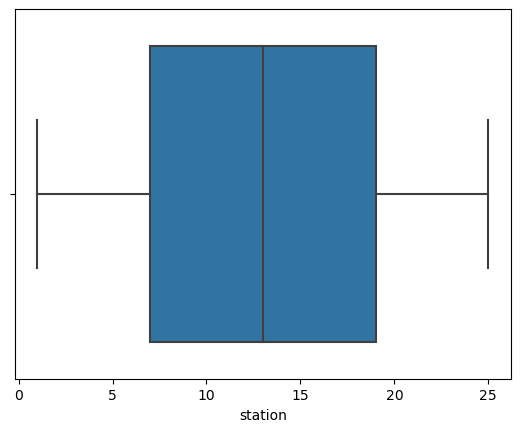

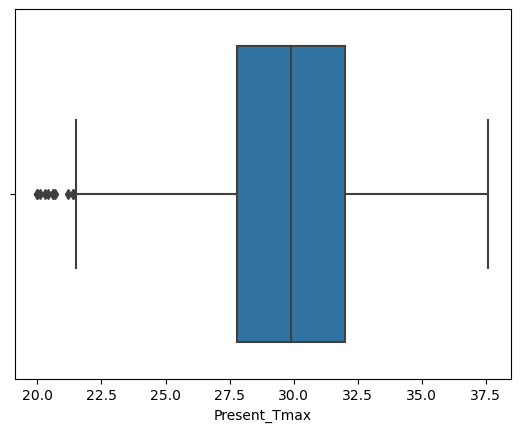

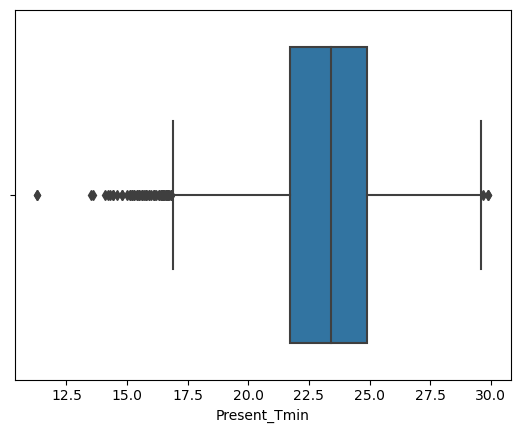

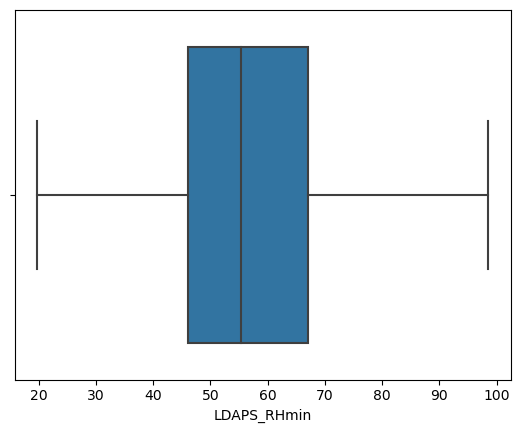

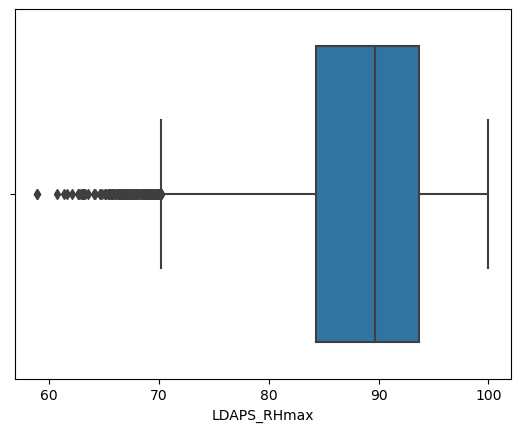

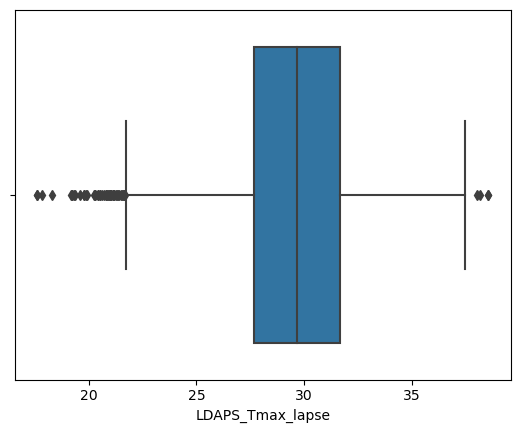

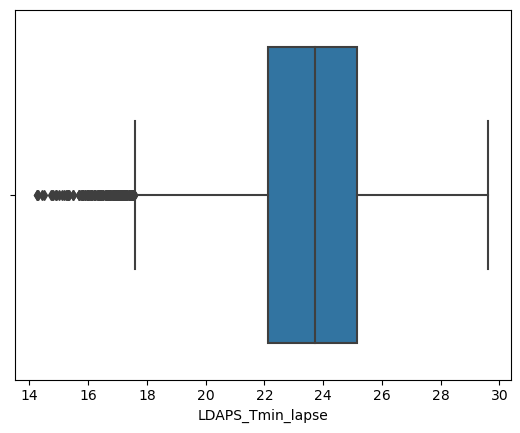

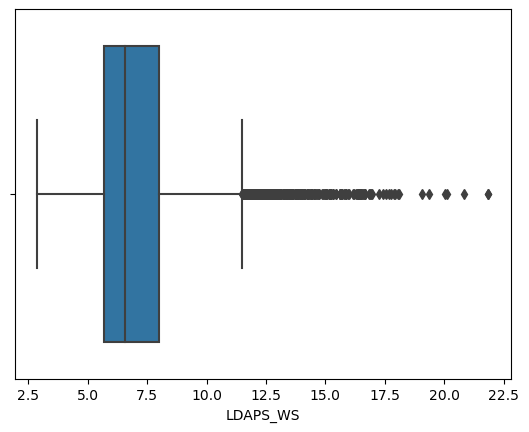

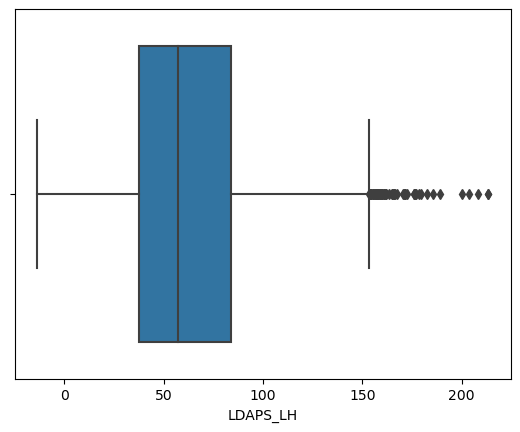

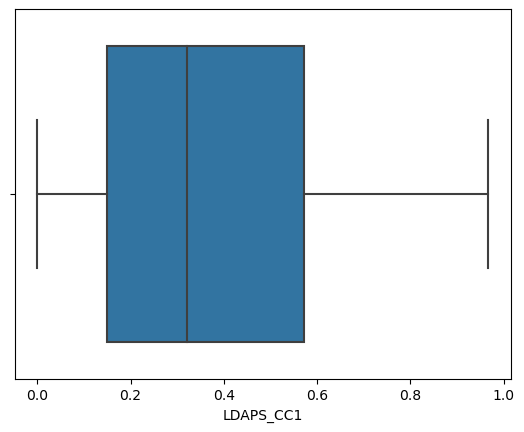

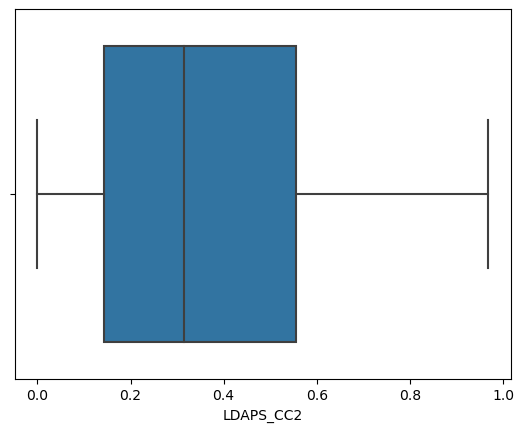

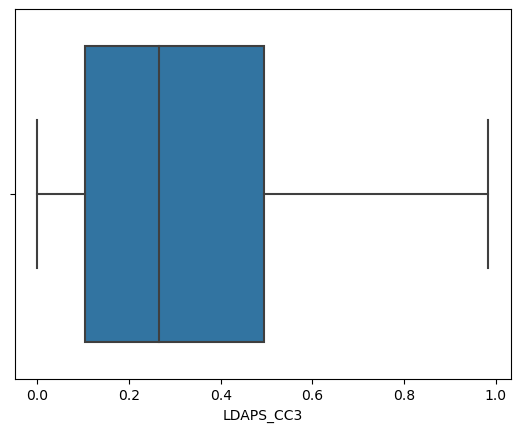

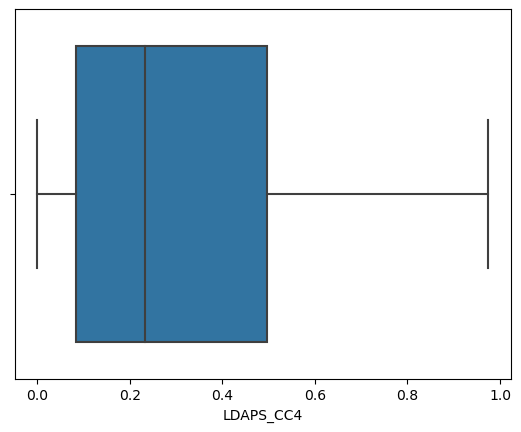

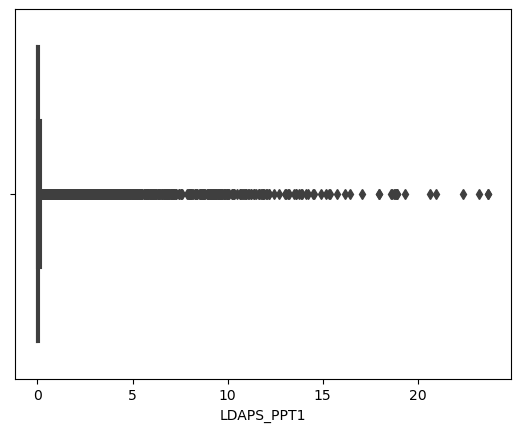

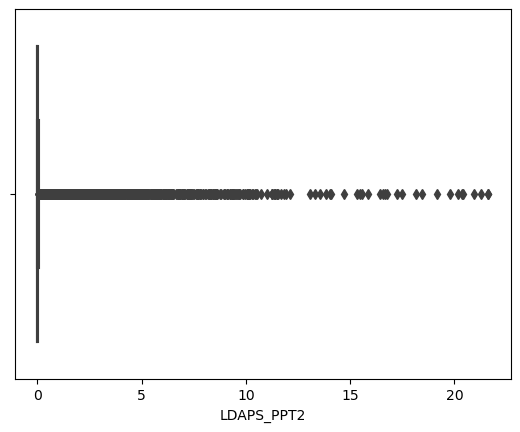

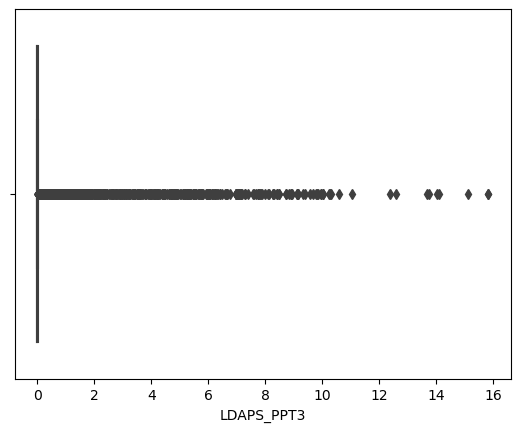

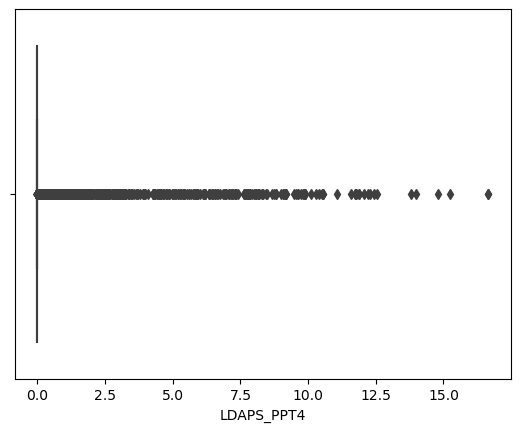

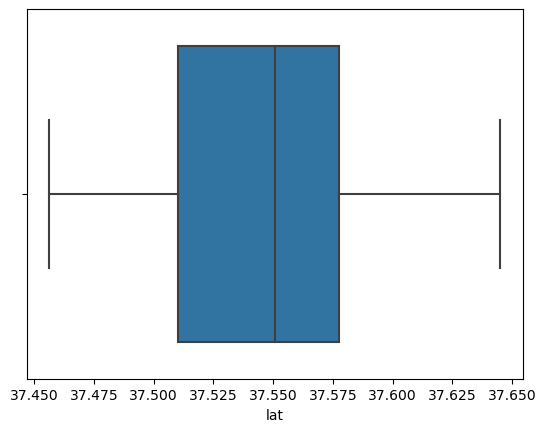

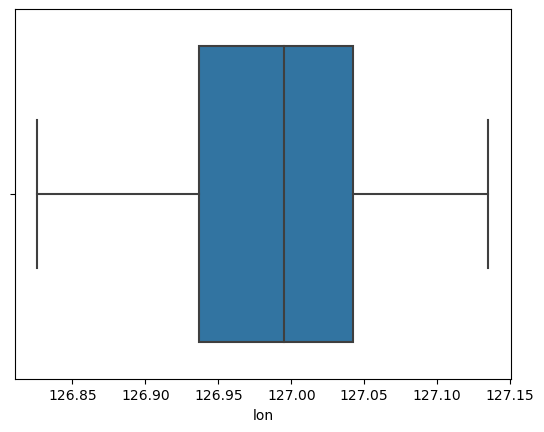

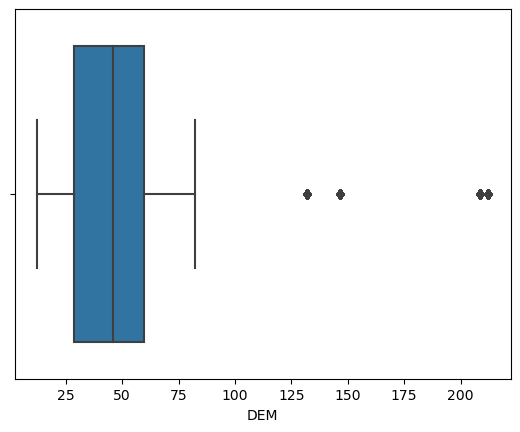

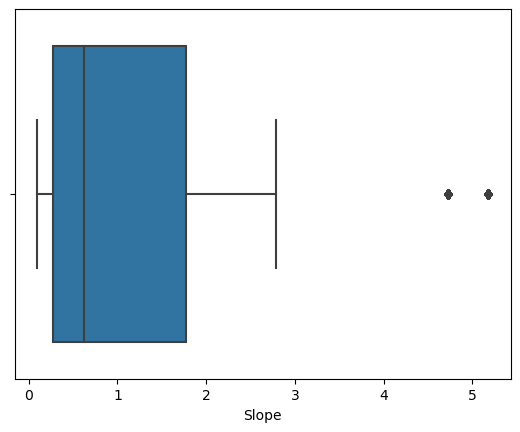

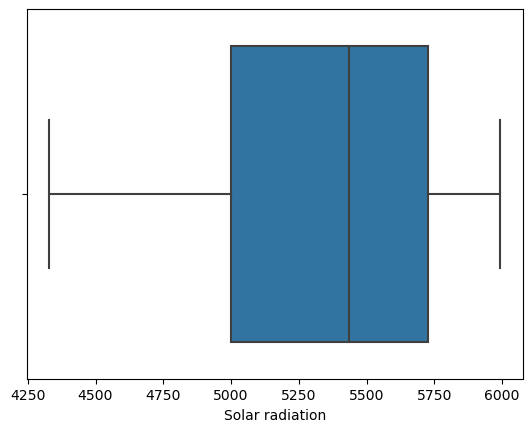

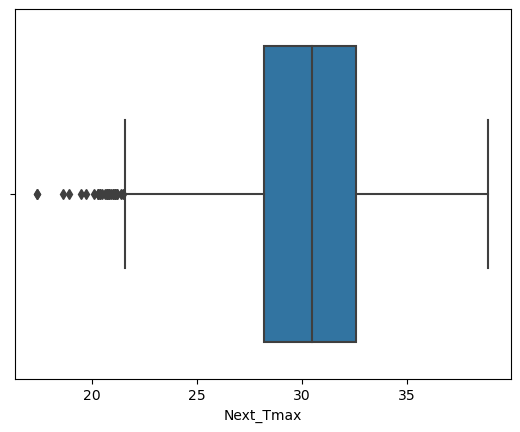

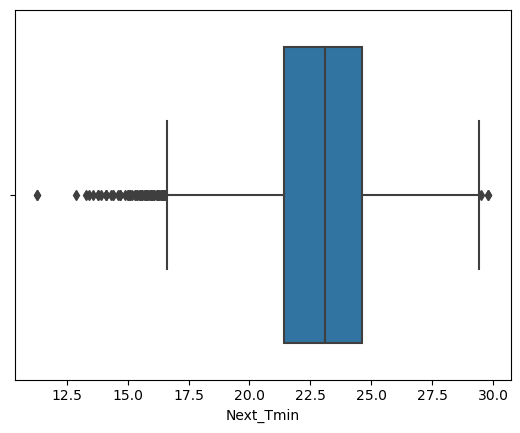

In [40]:
# Lets check the outliers

numerical_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',  'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [41]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

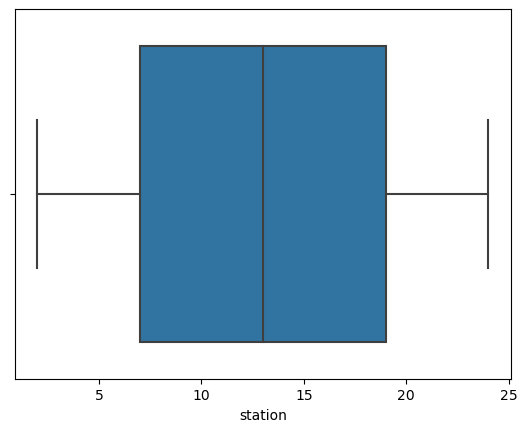

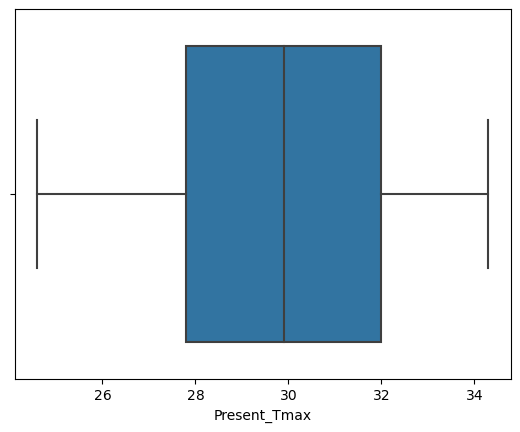

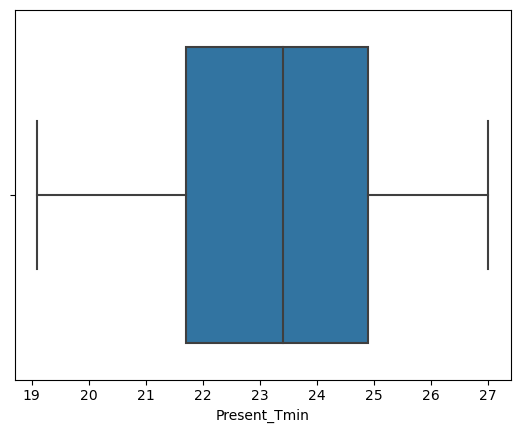

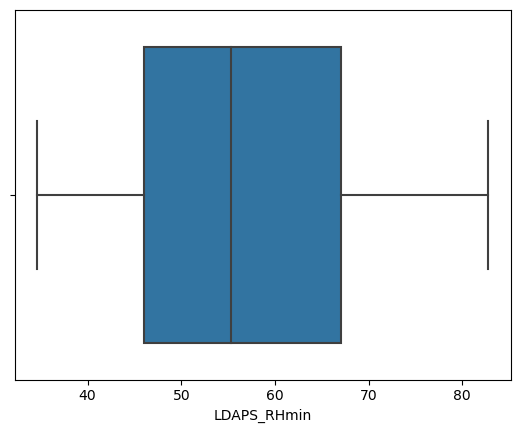

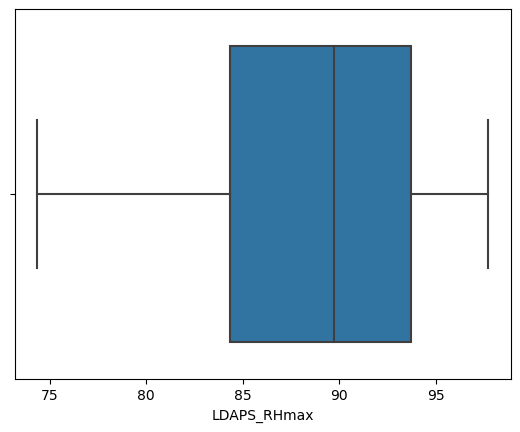

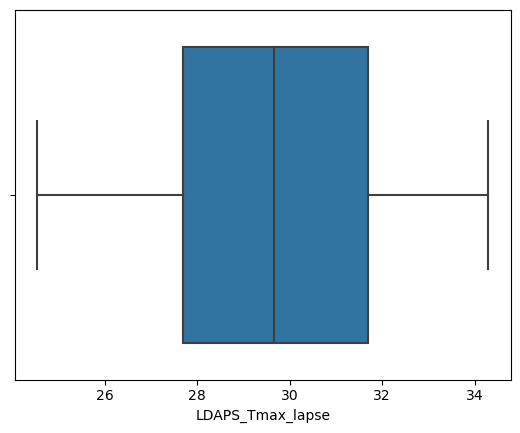

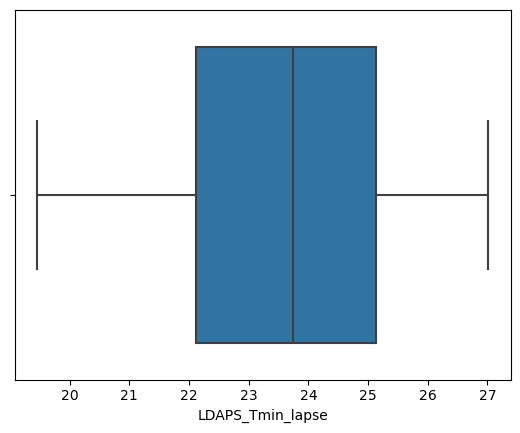

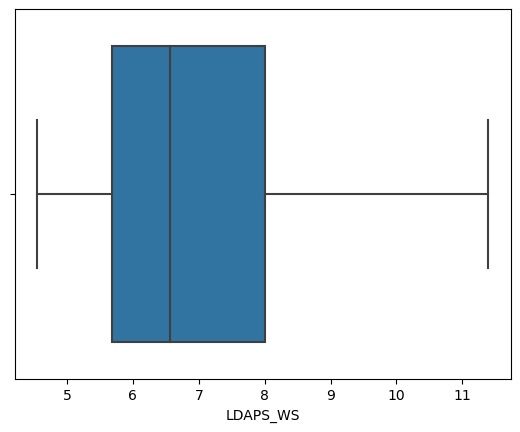

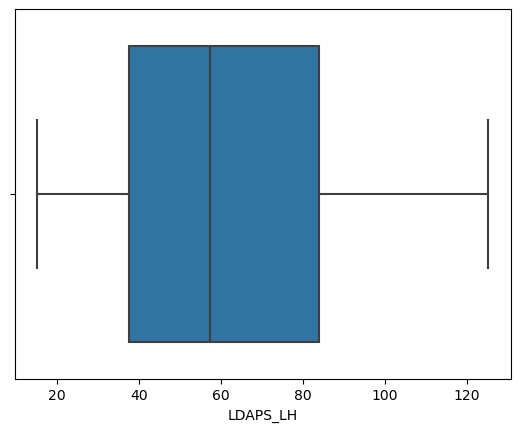

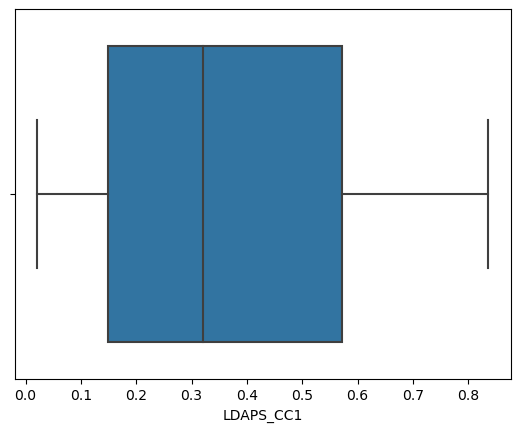

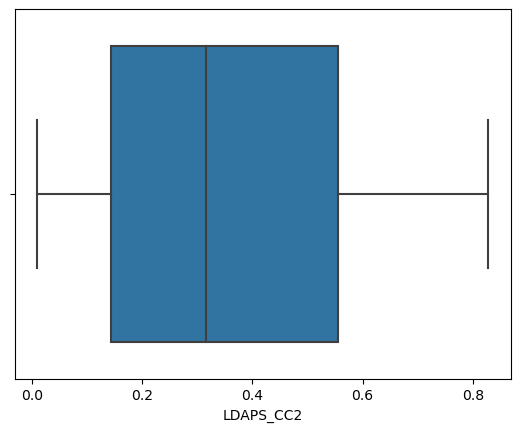

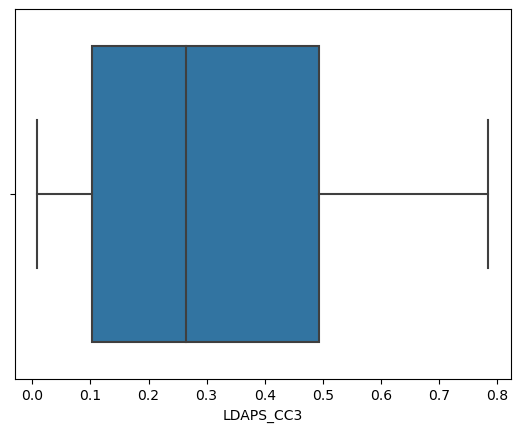

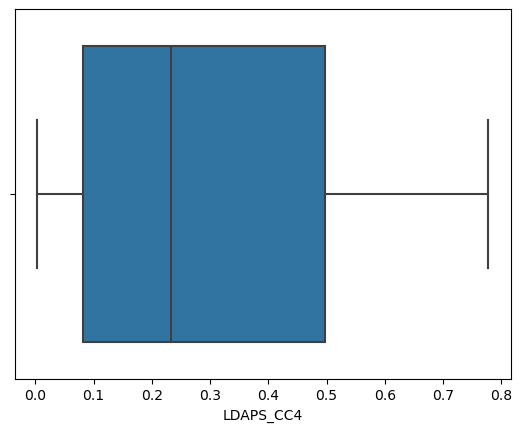

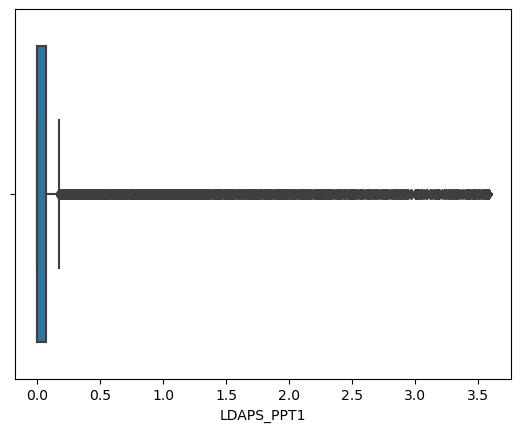

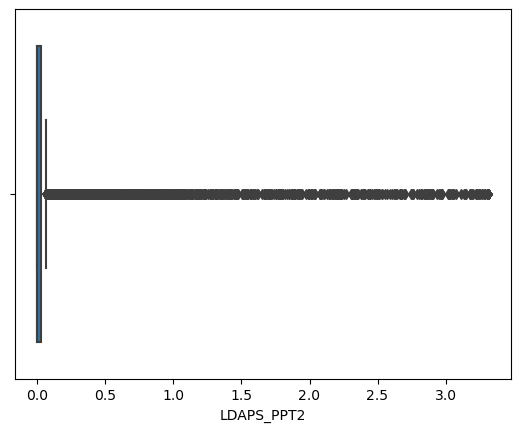

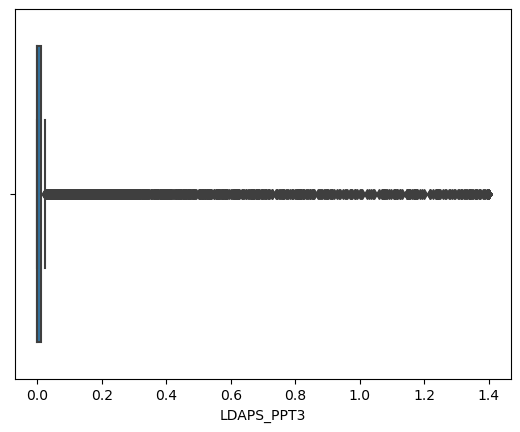

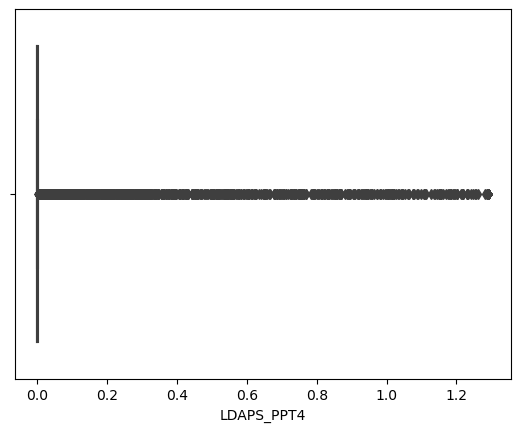

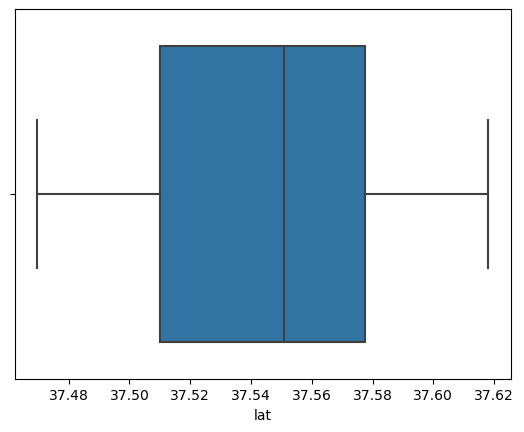

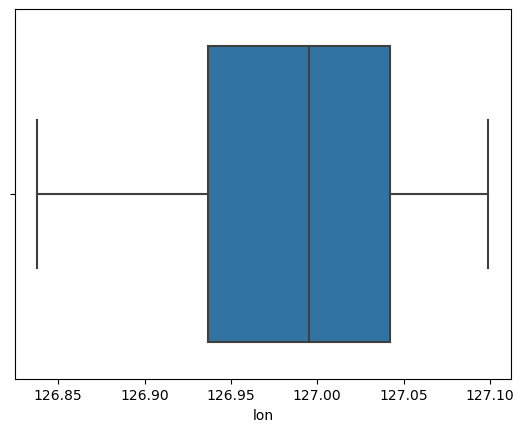

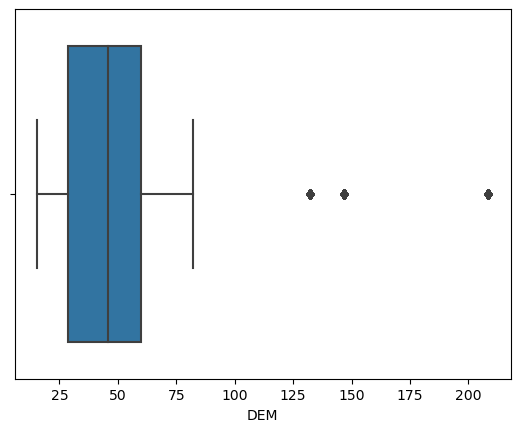

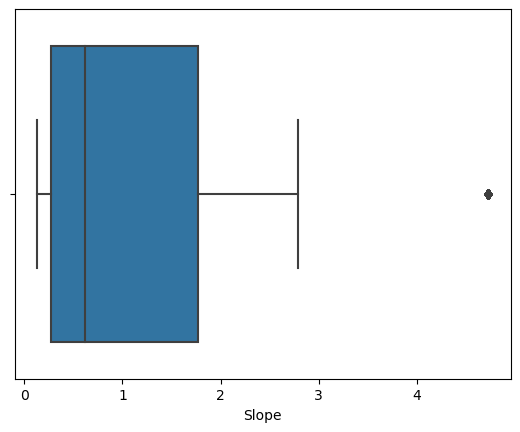

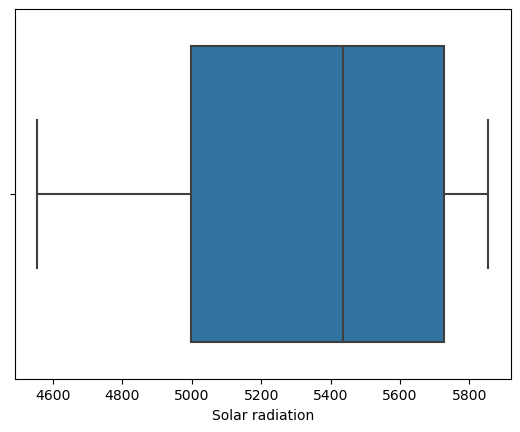

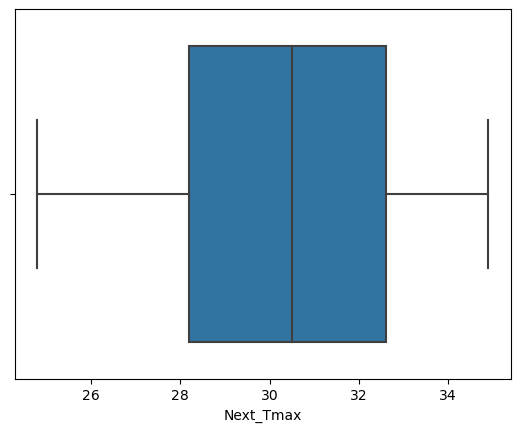

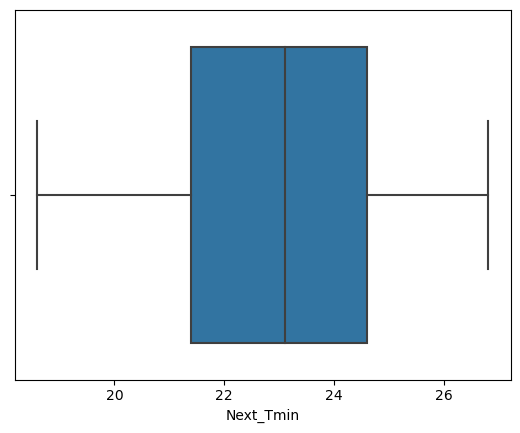

In [42]:
numerical_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',  'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

As we have treated outliers, and clipped the extreme values, by such way we have handled them possible.

# Skewness

Here we will be checking for skewness and those values which are not in the range of -0.5 to +0.5, will be handling them.

We will be using different techniques like Yeo-johnson transformation technique, box-cox transformation technique and log transformation technique to handle the skewness in the column.

In [43]:
df.skew()

station             0.000000
Present_Tmax       -0.199809
Present_Tmin       -0.142190
LDAPS_RHmin         0.272811
LDAPS_RHmax        -0.618490
LDAPS_Tmax_lapse   -0.108909
LDAPS_Tmin_lapse   -0.260675
LDAPS_WS            0.871438
LDAPS_LH            0.418675
LDAPS_CC1           0.412383
LDAPS_CC2           0.408766
LDAPS_CC3           0.530529
LDAPS_CC4           0.563275
LDAPS_PPT1          2.587483
LDAPS_PPT2          3.000502
LDAPS_PPT3          2.990463
LDAPS_PPT4          3.023782
lat                 0.009668
lon                -0.359154
DEM                 1.716988
Slope               1.468940
Solar radiation    -0.479739
Next_Tmax          -0.240058
Next_Tmin          -0.166503
dtype: float64

In [44]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']

# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# Round transformed values to 2 decimal places
df[columns] = df[columns].round(2)

df.skew()

station             0.000000
Present_Tmax       -0.199809
Present_Tmin       -0.142190
LDAPS_RHmin         0.272811
LDAPS_RHmax        -0.137168
LDAPS_Tmax_lapse   -0.108909
LDAPS_Tmin_lapse   -0.260675
LDAPS_WS            0.058983
LDAPS_LH            0.418675
LDAPS_CC1           0.412383
LDAPS_CC2           0.408766
LDAPS_CC3           0.080580
LDAPS_CC4           0.118401
LDAPS_PPT1          1.359399
LDAPS_PPT2          1.519200
LDAPS_PPT3          1.616494
LDAPS_PPT4          1.837548
lat                 0.009668
lon                -0.359154
DEM                 0.060343
Slope               0.236253
Solar radiation    -0.479739
Next_Tmax          -0.240058
Next_Tmin          -0.166503
dtype: float64

In [45]:
# Apply log transformation to few columns
df['LDAPS_PPT1'] = np.log(df['LDAPS_PPT1'] + 1)
df['LDAPS_PPT2'] = np.log(df['LDAPS_PPT2'] + 1)
df['LDAPS_PPT3'] = np.log(df['LDAPS_PPT3'] + 1)
df['LDAPS_PPT4'] = np.log(df['LDAPS_PPT4'] + 1)

df.skew()

station             0.000000
Present_Tmax       -0.199809
Present_Tmin       -0.142190
LDAPS_RHmin         0.272811
LDAPS_RHmax        -0.137168
LDAPS_Tmax_lapse   -0.108909
LDAPS_Tmin_lapse   -0.260675
LDAPS_WS            0.058983
LDAPS_LH            0.418675
LDAPS_CC1           0.412383
LDAPS_CC2           0.408766
LDAPS_CC3           0.080580
LDAPS_CC4           0.118401
LDAPS_PPT1          1.159252
LDAPS_PPT2          1.317733
LDAPS_PPT3          1.396793
LDAPS_PPT4          1.640006
lat                 0.009668
lon                -0.359154
DEM                 0.060343
Slope               0.236253
Solar radiation    -0.479739
Next_Tmax          -0.240058
Next_Tmin          -0.166503
dtype: float64

In [46]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# create a list of columns to transform
columns = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']

# apply BoxCox transformation to each column
for col in columns:
    data = df[col]
    # transform the data using BoxCox method
    data_transformed, lambda_val = boxcox(data+1)
    # replace the column with the transformed data
    df[col] = data_transformed
    
df.skew()    

station             0.000000
Present_Tmax       -0.199809
Present_Tmin       -0.142190
LDAPS_RHmin         0.272811
LDAPS_RHmax        -0.137168
LDAPS_Tmax_lapse   -0.108909
LDAPS_Tmin_lapse   -0.260675
LDAPS_WS            0.058983
LDAPS_LH            0.418675
LDAPS_CC1           0.412383
LDAPS_CC2           0.408766
LDAPS_CC3           0.080580
LDAPS_CC4           0.118401
LDAPS_PPT1          0.721554
LDAPS_PPT2          0.903123
LDAPS_PPT3          0.958810
LDAPS_PPT4          1.221556
lat                 0.009668
lon                -0.359154
DEM                 0.060343
Slope               0.236253
Solar radiation    -0.479739
Next_Tmax          -0.240058
Next_Tmin          -0.166503
dtype: float64

As we have handled skewness possibly.

# Correlation Between Target And Independent Variable

Now here, we will be checking the correlation matrix which shows the relation between target and independent variable. We will get it by using df.corr() function. We will be finding the correlation to know which feature is more positive or negatively correlated to the target vaiable, which will be helping us for the feature selction to avoid overfitting. We will also be visualizing this correlation with using heatmap. And will be using seaborn library for heatmap.

In [47]:
# Check the correlation

df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.101519      0.124197    -0.061024   
Present_Tmax      0.101519      1.000000      0.606825    -0.208733   
Present_Tmin      0.124197      0.606825      1.000000     0.118558   
LDAPS_RHmin      -0.061024     -0.208733      0.118558     1.000000   
LDAPS_RHmax      -0.168209     -0.339379     -0.047279     0.596670   
LDAPS_Tmax_lapse  0.063224      0.558640      0.443553    -0.580864   
LDAPS_Tmin_lapse  0.102862      0.611823      0.758255     0.086679   
LDAPS_WS          0.019166     -0.113219      0.000875     0.249550   
LDAPS_LH         -0.121952      0.129778     -0.005993    -0.061500   
LDAPS_CC1         0.007288     -0.316164      0.085941     0.613931   
LDAPS_CC2         0.004048     -0.212583      0.090900     0.745036   
LDAPS_CC3         0.001729     -0.128768      0.003555     0.669786   
LDAPS_CC4         0.007450     -0.125582     -0.032691     0.502283   
LDAPS_PPT1       -0.003431     -0.188661      0.107925     0.458744   
LDAPS_PPT2       -0.010059     -0.141638      0.111406     0.576712   
LDAPS_PPT3       -0.027802     -0.099109      0.018124     0.487577   
LDAPS_PPT4       -0.003734     -0.089548     -0.063381     0.322298   
lat              -0.222614     -0.056451     -0.086825     0.073216   
lon              -0.106776      0.010800     -0.040743    -0.083551   
DEM              -0.336326     -0.144987     -0.247147     0.068453   
Slope            -0.134897     -0.104451     -0.164233     0.086127   
Solar radiation  -0.015045     -0.037741      0.026790     0.239678   
Next_Tmax         0.098115      0.595967      0.452854    -0.444426   
Next_Tmin         0.121997      0.611555      0.787856     0.086682   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.168209          0.063224          0.102862  0.019166   
Present_Tmax        -0.339379          0.558640          0.611823 -0.113219   
Present_Tmin        -0.047279          0.443553          0.758255  0.000875   
LDAPS_RHmin          0.596670         -0.580864          0.086679  0.249550   
LDAPS_RHmax          1.000000         -0.412254         -0.165824  0.124142   
LDAPS_Tmax_lapse    -0.412254          1.000000          0.624547 -0.236392   
LDAPS_Tmin_lapse    -0.165824          0.624547          1.000000 -0.052694   
LDAPS_WS             0.124142         -0.236392         -0.052694  1.000000   
LDAPS_LH             0.233316          0.054360         -0.132719 -0.045682   
LDAPS_CC1            0.458868         -0.446670          0.014111  0.257703   
LDAPS_CC2            0.409341         -0.532520          0.054839  0.218757   
LDAPS_CC3            0.202723         -0.511331         -0.002865  0.137129   
LDAPS_CC4            0.116080         -0.406514         -0.042894  0.152355   
LDAPS_PPT1           0.435608         -0.312476         -0.008279  0.257907   
LDAPS_PPT2           0.427734         -0.422025          0.002095  0.246172   
LDAPS_PPT3           0.293746         -0.356330         -0.057343  0.152005   
LDAPS_PPT4           0.155141         -0.280787         -0.129182  0.198106   
lat                  0.212755         -0.042963         -0.099114  0.006952   
lon                  0.006990          0.095421         -0.028051 -0.064740   
DEM                  0.188445         -0.132884         -0.195185  0.128320   
Slope                0.210904         -0.122383         -0.176027  0.117834   
Solar radiation      0.171103          0.020150          0.119186  0.157209   
Next_Tmax           -0.326689          0.818315          0.563163 -0.277521   
Next_Tmin           -0.111378          0.569520          0.877022 -0.035091   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.121952   0.007288  ...   -0.010059   -0.027802   
Present_Tmax      0.129778  -0.316164  ...   -0.141638   -0.099109   
Present_Tmin     -0.005993   0.085941  ...    0.111406   

In [48]:
correlation_matrix= df.corr()
Next_Tmax_correlation= correlation_matrix['Next_Tmax']
print(Next_Tmax_correlation)

correlation_matrix= df.corr()
Next_Tmin_correlation= correlation_matrix['Next_Tmin']
print(Next_Tmin_correlation)

station             0.098115
Present_Tmax        0.595967
Present_Tmin        0.452854
LDAPS_RHmin        -0.444426
LDAPS_RHmax        -0.326689
LDAPS_Tmax_lapse    0.818315
LDAPS_Tmin_lapse    0.563163
LDAPS_WS           -0.277521
LDAPS_LH            0.159098
LDAPS_CC1          -0.451135
LDAPS_CC2          -0.490033
LDAPS_CC3          -0.481729
LDAPS_CC4          -0.424785
LDAPS_PPT1         -0.292614
LDAPS_PPT2         -0.372495
LDAPS_PPT3         -0.301366
LDAPS_PPT4         -0.268596
lat                -0.058356
lon                 0.003828
DEM                -0.133506
Slope              -0.100434
Solar radiation    -0.006753
Next_Tmax           1.000000
Next_Tmin           0.606845
Name: Next_Tmax, dtype: float64
station             0.121997
Present_Tmax        0.611555
Present_Tmin        0.787856
LDAPS_RHmin         0.086682
LDAPS_RHmax        -0.111378
LDAPS_Tmax_lapse    0.569520
LDAPS_Tmin_lapse    0.877022
LDAPS_WS           -0.035091
LDAPS_LH           -0.052798
LDAPS_CC1  

In [49]:
df= df.drop(['station', 'Slope', 'Solar radiation'], axis= 1)

# Visualize the correlation Matrix

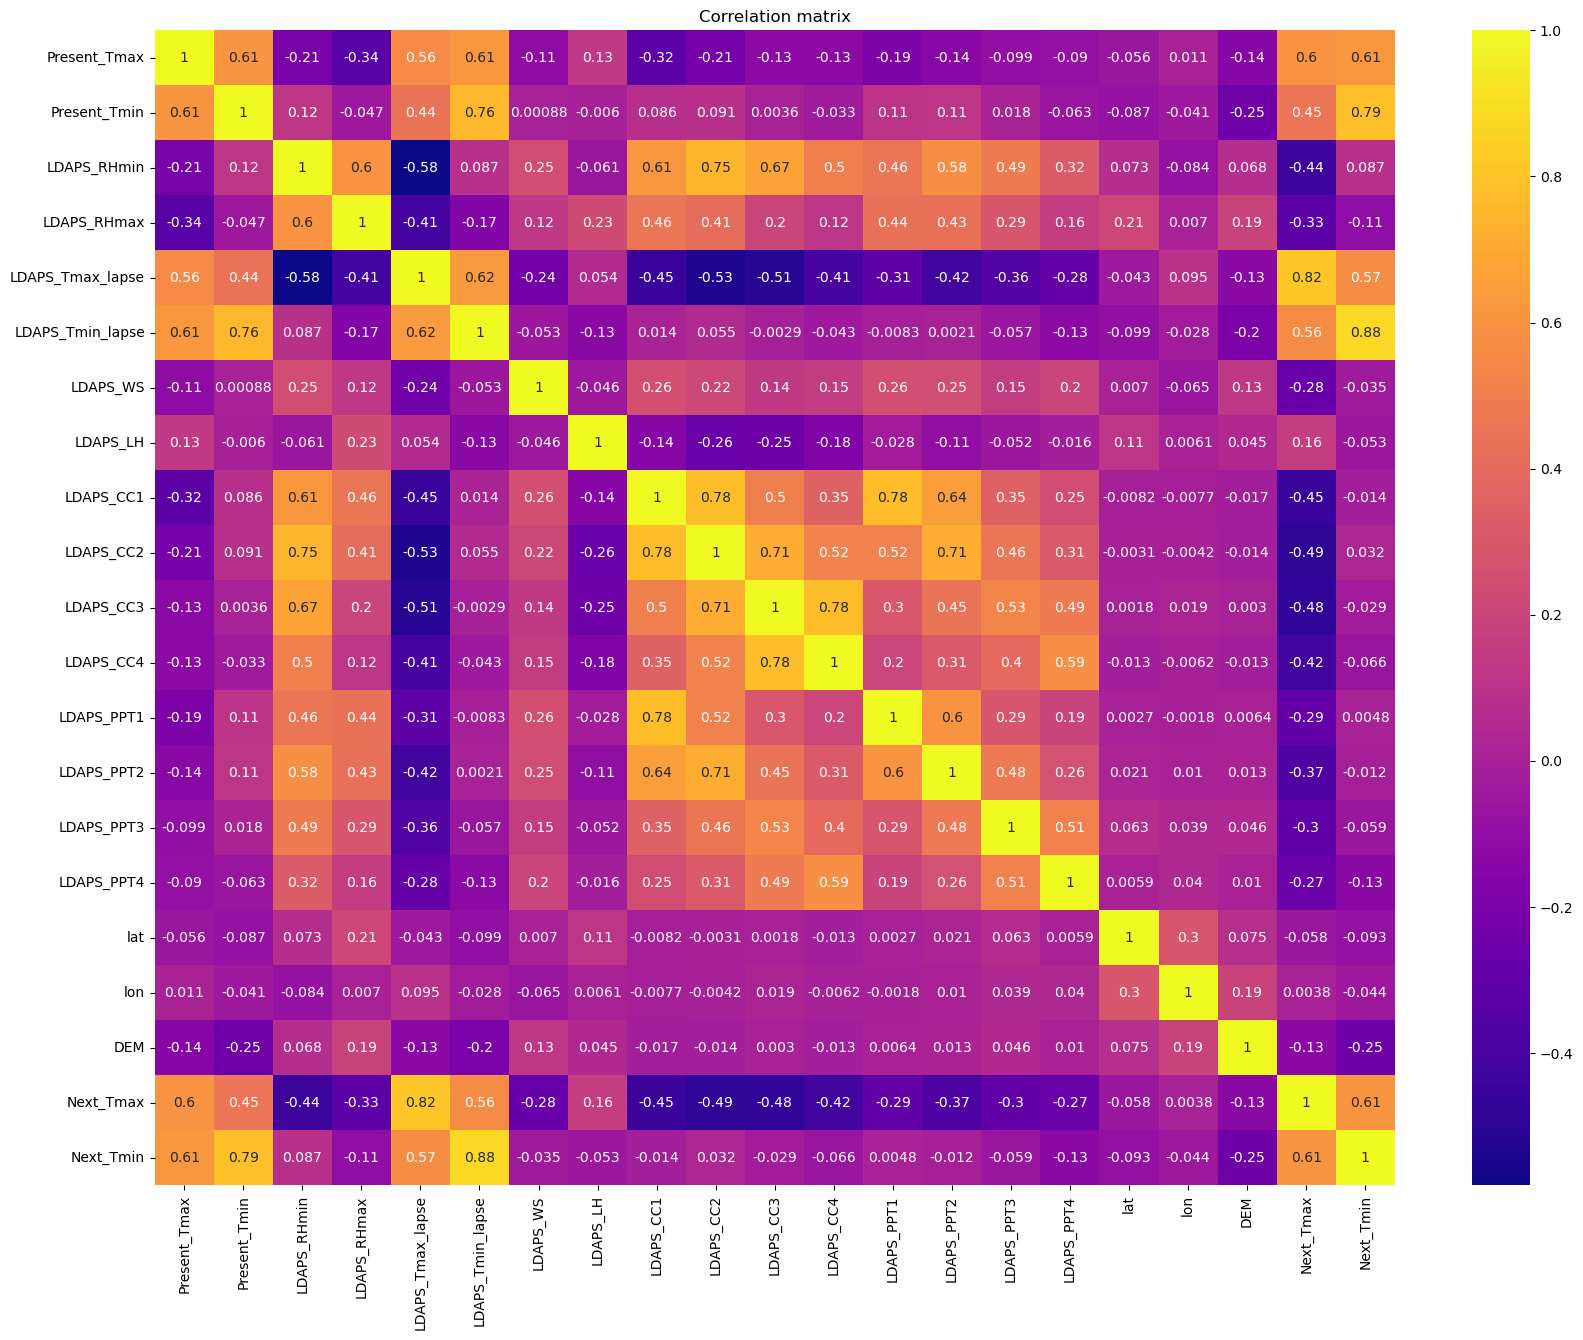

In [50]:
# Let's visualize the relation by using heatmap

correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation matrix')
plt.show()

# Featuring Engineering 

# A. Define Target and Independent Variable for 'Next_Tmax' Column

In [51]:
# Define Target and Independent Variable

y = df['Next_Tmax']
X = df.drop('Next_Tmax', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Next_Tmax
Target variable dimensions:  (7752,)

Features variables names:  ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Next_Tmin']
Features variables dimensions:  (7752, 20)


# Feature Selection

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = df['Next_Tmax']
X = df.drop('Next_Tmax', axis=1)

# Initialize the model
model= LinearRegression()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

Index(['LDAPS_Tmax_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'lon', 'Next_Tmin'], dtype='object')


In [53]:
fit_score = rfe.ranking_
print(fit_score)
# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print(feature_rankings)

[ 6  9 13 12  1  4  3 16  1  1  5  2 10 15 14  8 11  1  7  1]
             Feature  Ranking
9          LDAPS_CC2        1
17               lon        1
8          LDAPS_CC1        1
4   LDAPS_Tmax_lapse        1
19         Next_Tmin        1
11         LDAPS_CC4        2
6           LDAPS_WS        3
5   LDAPS_Tmin_lapse        4
10         LDAPS_CC3        5
0       Present_Tmax        6
18               DEM        7
15        LDAPS_PPT4        8
1       Present_Tmin        9
12        LDAPS_PPT1       10
16               lat       11
3        LDAPS_RHmax       12
2        LDAPS_RHmin       13
14        LDAPS_PPT3       14
13        LDAPS_PPT2       15
7           LDAPS_LH       16


In [54]:
X= X.drop(['LDAPS_LH', 'LDAPS_PPT2'], axis=1)

# Feature Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

      Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.422680      0.291139     0.490710     0.601156          0.361949   
1         0.752577      0.316456     0.366232     0.575145          0.544109   
2         0.721649      0.531646     0.292011     0.283237          0.568779   
3         0.762887      0.544304     0.490380     0.919075          0.529133   
4         0.701031      0.354430     0.447469     0.552023          0.468567   
...            ...           ...          ...          ...               ...   
7747      0.000000      0.000000     0.000000     0.115607          0.185384   
7748      0.000000      0.000000     0.000000     0.072254          0.252862   
7749      0.000000      0.000000     0.000000     0.069364          0.348149   
7750      0.000000      0.000000     0.000000     0.000000          0.000000   
7751      1.000000      1.000000     1.000000     1.000000          1.000000   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS

# Variance Inflation Factor(VIF)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                   X        VIF
0              const  38.539146
1       Present_Tmax   2.459380
2       Present_Tmin   3.282749
3        LDAPS_RHmin   5.888218
4        LDAPS_RHmax   2.346296
5   LDAPS_Tmax_lapse   6.174557
6   LDAPS_Tmin_lapse   7.546864
7           LDAPS_WS   1.196427
8          LDAPS_CC1   5.781688
9          LDAPS_CC2   4.796766
10         LDAPS_CC3   4.799830
11         LDAPS_CC4   3.163427
12        LDAPS_PPT1   2.980162
13        LDAPS_PPT3   1.774611
14        LDAPS_PPT4   1.915917
15               lat   1.196430
16               lon   1.216996
17               DEM   1.224264
18         Next_Tmin   5.511283


All the vif are in range.

# Best Random State

In [57]:
# Lets find the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Next_Tmax', axis=1), df['Next_Tmax'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 79
Best R^2 score: 0.7907454155398771


Here, we find the Best R^2 score is 0.7907454155398771 at best random state 79.

# Split The Data

In [58]:
# Let's split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=79)

# Modelling

# Linear Regression

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.8869754962354649
MAE: 1.0293720980641405
MSE: 1.7658829620373642
Root mean square error: 1.3288652911553391
Root squared on training data: 0.8738570536624619


Here we can see this model is performing  well on both the training and testing data i.e., R2 score for training data is 87.3% and for testing data is 88.6%.

# Ridge Regression (L2)

In [60]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7867490919107342
MAE on test data: 1.0293022942314398
MSE on test data: 1.7656878803265017
RMSE on test data: 1.3287918875153106
Root squared on training data: 0.7636259368881064


Here we can see this model is performing good on both the training and testing data i.e., R2 score for training data is 76.3% and for testing data is 78.6%.

# ElasticNet

In [61]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.7808830713588173
MAE on test data: 1.0422226416252856
MSE on test data: 1.8142577152081905
RMSE on test data: 1.3469438426334597
Root squared on training data: 0.7537534883018362


Here we can see this model is performing good on both the training and testing data i.e., R2 score for training data is 75.3% and for testing data is 78%.

# RandomForestRegression(RFR)

In [62]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=79)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9036138043265007
MAE on test data: 0.6593101149900149
MSE on test data: 0.7980643039523959
RMSE on test data: 0.8933444486604234
Root squared on training data: 0.9851149452459342


Here we can see this model is performing well on test data but perfoming excellent on training data which shows the overfitting condition. R2 score for training data is 98.5, and for test data is 90.3% .

# GradientBoostingRegression(GBR)

In [63]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=79)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8543954131597926
MAE on test data: 0.8381004340191449
MSE on test data: 1.2055857422003764
RMSE on test data: 1.0979916858521181
Root squared on training data: 0.8620459736711161


Here we can see this model is performing good on both the training and testing data i.e., R2 score for training data is 86.2% and for testing data is 85.4%.

Here we can Linear regression, L1,L2, and ElasticNet perform good on both training and testing data, among them linear regression performed best, and rest other two models shows overfitting ,as they are performing good on trainig data but less on test data.

Till here linear regression is the best performing and more fitted model. But as we have seen the overfitting conditions here with few models we will perform CV score method to check accuracy.

let's check CV score for more accuracy

# Cross Validation Score

# LR CV Score

In [64]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.67917484 0.65827883 0.67138614 0.82449947 0.69217286]
Mean of CV Scores:  0.7051024258404924
Difference between R2 score and mean CV score:  0.08162310508165671


# L2 CV Score

In [65]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.67917478 0.65828038 0.67138746 0.82450074 0.69217323]
Mean of CV Scores:  0.7051033183182536
Difference between R2 score and mean CV score:  0.08162459550987866


# ElasticNet CV Score

In [66]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.6744895  0.65777034 0.67477386 0.82507383 0.69273634]
Mean of CV Scores:  0.704968773916233
Difference between R2 score and mean CV score:  0.07591429744258427


# RFR CV Score

In [67]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=79)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.70253231 0.63435628 0.62402496 0.81670878 0.63498875]
Mean of CV Scores:  0.6825222174778256
Difference between R2 score and mean CV score:  0.22109158684867514


# GBR CV Score

In [68]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.71851673 0.65733967 0.67012265 0.84448845 0.65935265]
Mean of CV Scores:  0.7099640310214923
Difference between R2 score and mean CV score:  0.14454363880867593


Based on the difference between R2 score and mean CV score , we can see that the ElasticNet Regressor is the best performing model in this case. The smaller the difference, the better the model's generalization performance.

ElasticNet Regression is the best fitted and performing model with least difference yet. But as Ridge Regression and Linear Regression are other two which is showing least difference, we will be performing hyperparameter tuning technique on these.

Now we will perform hyperparametertuning for more accuracy to the best two model to check their performance more accurately and decide which is best performing model.

# Hyperparameter Tuning

Here in this step we will be using the GridSearchCV technique for performing hyperparameter tuning.

Hyperparameters are those parameters which are not learned from the data but predefined when the learning process begins. They basically controls the behaviour of the learning algorithm and shows the significant impact on the performance of the model.


GridSearchCV

# ElasticNet Regressor

In [69]:
# Initialize the L1 model
elastic_net_model= ElasticNet()

# Define Hyperparameter to tune
hyperparameters= {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                  'l1_ratio': [0.25, 0.5, 0.75],
                 'fit_intercept': [True, False],
                 'selection': ['cyclic', 'random']}


# Scale the features
scaler= MinMaxScaler()
scaled_X= scaler.fit_transform(X)

# Initialize GridSearchCV
grid_search= GridSearchCV(elastic_net_model, hyperparameters, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model= grid_search.best_estimator_
best_params= grid_search.best_params_

# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Make prediction on test data using best model
y_pred= best_model.predict(X_test)

# Evaluate model performance
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)

Best hyperparameters:  {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 20, 'selection': 'random'}
Best R2 score:  0.7529063068930136
Root squared on test data: 0.8543954131597926


Now performing hyperparameter tuning on best three model, we have found ElasticNet as the best performing model by improving its R2 score for test data from 78.4% to 85.4% after applying hyperparameter tuning.

Now we will save this best performing model for unseen data prediction. We will be using joblib library to save the model.

# Save 'Next_Tmax' Model

In [70]:
# Saving model for the prediction of unseen data

import joblib

# Save the model using joblib
joblib.dump(elastic_net_model, 'Next_Tmax_model.joblib')

['Next_Tmax_model.joblib']

# B. Define Target And Independent Variable For 'Next_Tmin' Column

In [71]:
# Define Target and Independent Variable

y = df['Next_Tmin']
X = df.drop('Next_Tmin', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Next_Tmin
Target variable dimensions:  (7752,)

Features variables names:  ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Next_Tmax']
Features variables dimensions:  (7752, 20)


# Feature Selection

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = df['Next_Tmin']
X = df.drop('Next_Tmin', axis=1)

# Initialize the model
model= LinearRegression()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

Index(['Present_Tmin', 'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2',
       'Next_Tmax'],
      dtype='object')


In [73]:
fit_score = rfe.ranking_
print(fit_score)
# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print(feature_rankings)

[13  1 14  3  8  1  5 16  1  1  6 10 12  9 15 11  2  7  4  1]
             Feature  Ranking
9          LDAPS_CC2        1
8          LDAPS_CC1        1
5   LDAPS_Tmin_lapse        1
19         Next_Tmax        1
1       Present_Tmin        1
16               lat        2
3        LDAPS_RHmax        3
18               DEM        4
6           LDAPS_WS        5
10         LDAPS_CC3        6
17               lon        7
4   LDAPS_Tmax_lapse        8
13        LDAPS_PPT2        9
11         LDAPS_CC4       10
15        LDAPS_PPT4       11
12        LDAPS_PPT1       12
0       Present_Tmax       13
2        LDAPS_RHmin       14
14        LDAPS_PPT3       15
7           LDAPS_LH       16


In [74]:
X= X.drop(['LDAPS_PPT3', 'LDAPS_LH'], axis=1)

# Feature Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

      Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.422680      0.291139     0.490710     0.601156          0.361949   
1         0.752577      0.316456     0.366232     0.575145          0.544109   
2         0.721649      0.531646     0.292011     0.283237          0.568779   
3         0.762887      0.544304     0.490380     0.919075          0.529133   
4         0.701031      0.354430     0.447469     0.552023          0.468567   
...            ...           ...          ...          ...               ...   
7747      0.000000      0.000000     0.000000     0.115607          0.185384   
7748      0.000000      0.000000     0.000000     0.072254          0.252862   
7749      0.000000      0.000000     0.000000     0.069364          0.348149   
7750      0.000000      0.000000     0.000000     0.000000          0.000000   
7751      1.000000      1.000000     1.000000     1.000000          1.000000   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS

# Variance Inflation Factor(VIF)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                   X        VIF
0              const  41.278914
1       Present_Tmax   2.559909
2       Present_Tmin   2.957050
3        LDAPS_RHmin   5.863780
4        LDAPS_RHmax   2.345893
5   LDAPS_Tmax_lapse   7.527085
6   LDAPS_Tmin_lapse   5.897818
7           LDAPS_WS   1.235996
8          LDAPS_CC1   5.772196
9          LDAPS_CC2   5.770944
10         LDAPS_CC3   4.614276
11         LDAPS_CC4   3.134068
12        LDAPS_PPT1   3.238833
13        LDAPS_PPT2   2.540722
14        LDAPS_PPT4   1.673530
15               lat   1.193967
16               lon   1.225275
17               DEM   1.196330
18         Next_Tmax   3.863028


All vif is handled and on range.

# Best Random State

In [77]:
# Lets find the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Next_Tmin', axis=1), df['Next_Tmin'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 42
Best R^2 score: 0.8527126906766715


Here, we find the Best R^2 score is 0.8527126906766715 at best random state 42.

# Split The Data

In [78]:
# Let's split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6201, 18)
(1551, 18)
(6201,)
(1551,)


# Modelling

# Linear Regression

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.9233120658410578
MAE: 0.6952275590637771
MSE: 0.7611294452663802
Root mean square error: 0.8724273295045153
Root squared on training data: 0.9140973210387021


Here we can see this model is performing well on both the training and testing data i.e., R2 score for training data is 91.4% and for testing data is 92.3%.

# Ridge(L2) Regression

In [80]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8524999969060301
MAE on test data: 0.6952623533009038
MSE on test data: 0.7611561451870108
RMSE on test data: 0.8724426314589463
Root squared on training data: 0.8355738377400237


Here we can see this model is performing well on both the training and testing data i.e., R2 score for training data is 83.5% and for testing data is 85.2%.

# ElasticNet Regression

In [81]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8475966423959682
MAE on test data: 0.7107805748408029
MSE on test data: 0.7864593203671919
RMSE on test data: 0.8868254170732771
Root squared on training data: 0.8314299605906432


Here we can see this model is performing well on both the training and testing data i.e., R2 score for training data is 83.1% and for testing data is 84.7%.

# RandomForestRegression(RFR)

In [82]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9101131575880955
MAE on test data: 0.5122776875968935
MSE on test data: 0.46385031212297356
RMSE on test data: 0.6810655710891379
Root squared on training data: 0.9865369676044429


Here we can see this model is performing well on test data but perfoming excellent on training data which shows the overfitting condition. R2 score for training data is 98.6%, and for test data is 91% .

# GradientBoostingRegression(GBR)

In [83]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error, mean squared error, and root mean squared error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.894641292598969
MAE on test data: 0.582410531523051
MSE on test data: 0.5436910230853645
RMSE on test data: 0.7373540690098377
Root squared on training data: 0.9003590596573826


Here we can see this model is performing well on both the training and testing data i.e., R2 score for training data is 90% and for testing data is 89.4 %.

Here we can Linear regression, L1,L2,and ElasticNet regression, perform good on both training and testing data, among them linear regression performed best, and rest other models shows overfitting ,as they are performing good on trainig data but less on test data.

Till here linear regression is the best performing and more fitted model. But as we have seen the overfitting conditions here with few models we will perform CV score method to check accuracy.

# Cross Validation Score

# LR CV Score

In [84]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.71417295 0.67459732 0.80205307 0.87450525 0.86836088]
Mean of CV Scores:  0.7867378925493517
Difference between R2 score and mean CV score:  0.06576727837833019


# L2 CV Score

In [85]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.71417202 0.67459739 0.80205384 0.87450514 0.86836269]
Mean of CV Scores:  0.7867382161820253
Difference between R2 score and mean CV score:  0.06576644299199286


# ElasticNet CV Score

In [86]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.71345813 0.67530839 0.80180298 0.87518474 0.8708186 ]
Mean of CV Scores:  0.7873145663313135
Difference between R2 score and mean CV score:  0.060282076064654744


# RFR CV Score

In [87]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.71027711 0.66447449 0.80511682 0.88105443 0.85632487]
Mean of CV Scores:  0.7834495458349929
Difference between R2 score and mean CV score:  0.1266636117531026


# GBR CV Score

In [88]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.69308538 0.66744665 0.82320927 0.87620064 0.87736104]
Mean of CV Scores:  0.7874605960680287
Difference between R2 score and mean CV score:  0.10715104277277965


Based on the difference between R2 score and mean CV score , we can see that the ElasticNet Regressor is the best performing model in this case. The smaller the difference, the better the model's generalization performance.

ElasticNet Regression is the best fitted and performing model with least difference yet. But as Linear Regression and Ridge(L2) Regression are other two which is showing least difference, we will be performing hyperparameter tuning technique on these.

Now we will perform hyperparametertuning for more accuracy to the best two model to check their performance more accurately and decide which is best performing model.

# Hyperparameter Tuning

# ElasticNet Regressor

In [89]:
# Initialize the L1 model
elastic_net_model= ElasticNet()

# Define Hyperparameter to tune
hyperparameters= {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                  'l1_ratio': [0.25, 0.5, 0.75],
                 'fit_intercept': [True, False],
                 'selection': ['cyclic', 'random']}


# Scale the features
scaler= MinMaxScaler()
scaled_X= scaler.fit_transform(X)

# Initialize GridSearchCV
grid_search= GridSearchCV(elastic_net_model, hyperparameters, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model= grid_search.best_estimator_
best_params= grid_search.best_params_

# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Make prediction on test data using best model
y_pred= best_model.predict(X_test)

# Evaluate model performance
r2_test = r2_score(y_test, y_test_pred)

print("Root squared on test data:", r2_test)

Best hyperparameters:  {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 20, 'selection': 'cyclic'}
Best R2 score:  0.8308384224037116
Root squared on test data: 0.894641292598969


Now performing hyperparameter tuning on best three model, we have found ElasticNet as the best performing model by improving its R2 score for test data from 84.7 % to 89.4 % after applying hyperparameter tuning.

Now we will save this best performing model for unseen data prediction. We will be using joblib library to save the model.

# Save the "Next_Tmin" Model

In [90]:
# Saving model for the prediction of unseen data

import joblib

# Save the model using joblib
joblib.dump(elastic_net_model, 'Next_Tmin_model.joblib')

['Next_Tmin_model.joblib']